##Customer Personality Analysis
##Problem Statement

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

## Import Packages

In [ ]:
import sklearn
print(sklearn.__version__)
!pip install --upgrade category_encoders -q
!pip install -q shap
!pip install --upgrade shap==0.44.1 -q
import shap
shap.initjs()

1.5.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 20.3 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer

import warnings
warnings.filterwarnings('ignore')


from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

In [ ]:
!pip install kagglehub


In [ ]:
# Step 1: Install Kaggle Hub (if not already installed)
!pip install kagglehub

# Step 2: Import the necessary libraries
import kagglehub
import pandas as pd

# Step 3: Download the dataset
imakash3011_customer_personality_analysis_path = kagglehub.dataset_download('imakash3011/customer-personality-analysis')

print('Data source import complete.')

# Step 4: Load the tab-separated CSV file
data = pd.read_csv(imakash3011_customer_personality_analysis_path + '/marketing_campaign.csv', sep="\t")  # Use \t as the separator


Data source import complete.


In [ ]:
# Display the first few rows of the dataset
print(data.head())

     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0

In [ ]:
from IPython.display import display, Markdown
display(Markdown("### Glimpse Of The Dataset:"))
data.head().style.set_properties(**{
    "background-color": "#8B4513",
    "color": "white",
    "border": "1.5px solid black"
})

### Glimpse Of The Dataset:

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
data.shape

(2240, 29)

In [ ]:
display(Markdown("### Glimpse Of The Dataset:"))
data.describe().style.set_properties(**{"background-color": "#8B4513","color":"#FFFFFF","border": "1.5px solid black"})

### Glimpse Of The Dataset:

**Checking for missing value in the dataset**

In [ ]:
# NA values in train dataset
display(Markdown("###Null values of the Dataset :"))
data.isnull().sum().sort_values(ascending = False)


###Null values of the Dataset :

Income                 24
ID                      0
NumDealsPurchases       0
Z_Revenue               0
Z_CostContact           0
Complain                0
AcceptedCmp2            0
AcceptedCmp1            0
AcceptedCmp5            0
AcceptedCmp4            0
AcceptedCmp3            0
NumWebVisitsMonth       0
NumStorePurchases       0
NumCatalogPurchases     0
NumWebPurchases         0
MntGoldProds            0
Year_Birth              0
MntSweetProducts        0
MntFishProducts         0
MntMeatProducts         0
MntFruits               0
MntWines                0
Recency                 0
Dt_Customer             0
Teenhome                0
Kidhome                 0
Marital_Status          0
Education               0
Response                0
dtype: int64

In [ ]:
# Number of distinct observations in dataset
for i in data.columns:
    print(i, ':', data[i].nunique())

ID : 2240
Year_Birth : 59
Education : 5
Marital_Status : 8
Income : 1974
Kidhome : 3
Teenhome : 3
Dt_Customer : 663
Recency : 100
MntWines : 776
MntFruits : 158
MntMeatProducts : 558
MntFishProducts : 182
MntSweetProducts : 177
MntGoldProds : 213
NumDealsPurchases : 15
NumWebPurchases : 15
NumCatalogPurchases : 14
NumStorePurchases : 14
NumWebVisitsMonth : 16
AcceptedCmp3 : 2
AcceptedCmp4 : 2
AcceptedCmp5 : 2
AcceptedCmp1 : 2
AcceptedCmp2 : 2
Complain : 2
Z_CostContact : 1
Z_Revenue : 1
Response : 2


In [ ]:
data.describe(include=object).T.style.set_properties(**{"background-color": "#8B4513","color":"#FFFFFF","border": "1.5px solid black"})

**Insights:**

* There are missing values in **Income**. We will drop the rows that have missing income values.
* **Dt_Customer** that indicates the date a customer joined in this dataset is not parsed as DateTime.
* We will encode the categorical features into numerical form later.

##Data Preprocessing

**Dropping the missing values**

In [ ]:
data.dropna(axis = 0, inplace = True)
print(f"After dropping null values, the shape of the Dataset is {data.shape}")
print(f"After dropping null values, null values of the Dataset :")
data.isna().sum().to_frame().T.style.set_properties(**{"background-color": "#682F2F","color":"#e9c46a","border": "1.5px solid black"})

After dropping null values, the shape of the Dataset is (2216, 29)
After dropping null values, null values of the Dataset :


**Convert the Date of customer's enrollment with the company to date time**

In [ ]:
# Convert the Dt_Customer column to datetime, specifying that the day comes first
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"], dayfirst=True)

# Proceed with extracting dates and finding the oldest and newest enrollment dates
dates = []
for i in data["Dt_Customer"]:
    i = i.date()
    dates.append(i)

print(f"Newest customer's enrolment date is {max(dates)}")
print(f"Oldest customer's enrolment date is {min(dates)}")



Newest customer's enrolment date is 2014-06-29
Oldest customer's enrolment date is 2012-07-30


##Renaming Columns

In [ ]:
data.rename(columns={"Marital_Status": "Marital Status","MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold","NumWebPurchases": "Web","NumCatalogPurchases":"Catalog","NumStorePurchases":"Store","NumDealsPurchases":"Discount Purchases"}, inplace = True)
#data = data[["ID","Age","Education","Marital Status","Parental Status","Children","Kidhome","Teenhome","Income","Spent","Customer Loyalty","Recency","Wines","Fruits","Meat","Fish","Sweets","Gold","Web","Catalog","Store","Discount Purchases","Total Promo","NumWebVisitsMonth"]]

##Feature Engineering

This segment calculates the loyalty of customers in terms of days since their enrollment.

In [ ]:
days = []
newest = max(dates)
for i in dates:
    duration = newest - i
    days.append(duration)
data["Customer Loyalty"] = days
data["Customer Loyalty"] = data["Customer Loyalty"].dt.days


Calculate Age

In [ ]:
data["Age"] = 2015 - data["Year_Birth"]


Calculate spending

In [ ]:
data["Spent"] = data["Wines"] + data["Fruits"] + data["Meat"] + data["Fish"] + data["Sweets"] + data["Gold"]


Calculate number of children

In [ ]:
data["Children"] = data["Kidhome"] + data["Teenhome"]


Parental status

In [ ]:
data["Parental Status"] = np.where(data["Children"] > 0, 1, 0)


Replace martial status

In [ ]:
data["Marital Status"].replace({"Married":"Couple", "Together":"Couple", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone"}, inplace = True)


Replace Education

In [ ]:
data["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"}, inplace = True)


Total promotion accepted

In [ ]:
data["Total Promo"] =  data["AcceptedCmp1"] + data["AcceptedCmp2"] + data["AcceptedCmp3"] + data["AcceptedCmp4"] + data["AcceptedCmp5"]


In [ ]:
data

ID  Year_Birth     Education Marital Status   Income  Kidhome  \
0      5524        1957      Graduate          Alone  58138.0        0   
1      2174        1954      Graduate          Alone  46344.0        1   
2      4141        1965      Graduate         Couple  71613.0        0   
3      6182        1984      Graduate         Couple  26646.0        1   
4      5324        1981  Postgraduate         Couple  58293.0        1   
...     ...         ...           ...            ...      ...      ...   
2235  10870        1967      Graduate         Couple  61223.0        0   
2236   4001        1946  Postgraduate         Couple  64014.0        2   
2237   7270        1981      Graduate          Alone  56981.0        0   
2238   8235        1956  Postgraduate         Couple  69245.0        0   
2239   9405        1954  Postgraduate         Couple  52869.0        1   

      Teenhome Dt_Customer  Recency  Wines  ...  Complain  Z_CostContact  \
0            0  2012-09-04       58    635  ...         0              3   
1            1  2014-03-08       38     11  ...         0              3   
2            0  2013-08-21       26    426  ...         0              3   
3            0  2014-02-10       26     11  ...         0              3   
4            0  2014-01-19       94    173  ...         0              3   
...        ...         ...      ...    ...  ...       ...            ...   
2235         1  2013-06-13       46    709  ...         0              3   
2236         1  2014-06-10       56    406  ...         0              3   
2237         0  2014-01-25       91    908  ...         0              3   
2238         1  2014-01-24        8    428  ...         0              3   
2239         1  2012-10-15       40     84  ...         0              3   

      Z_Revenue  Response  Customer Loyalty  Age  Spent  Children  \
0            11         1               663   58   1617         0   
1            11         0               113   61     27         2   
2            11         0               312   50    776         0   
3            11         0               139   31     53         1   
4            11         0               161   34    422         1   
...         ...       ...               ...  ...    ...       ...   
2235         11         0               381   48   1341         1   
2236         11         0                19   69    444         3   
2237         11         0               155   34   1241         0   
2238         11         0               156   59    843         1   
2239         11         1               622   61    172         2   

      Parental Status  Total Promo  
0                   0            0  
1                   1            0  
2                   0            0  
3                   1            0  
4                   1            0  
...               ...          ...  
2235                1            0  
2236                1            1  
2237                0            1  
2238                1            0  
2239                1            0  

[2216 rows x 35 columns]

**Select Relevant columns**

In [ ]:
data = data[["ID", "Age", "Education", "Marital Status", "Parental Status", "Children", "Kidhome", "Teenhome", "Income", "Spent", "Customer Loyalty", "Recency", "Wines", "Fruits", "Meat", "Fish", "Sweets", "Gold", "Web", "Catalog", "Store", "Discount Purchases", "Total Promo", "NumWebVisitsMonth"]]


In [ ]:
data

ID  Age     Education Marital Status  Parental Status  Children  \
0      5524   58      Graduate          Alone                0         0   
1      2174   61      Graduate          Alone                1         2   
2      4141   50      Graduate         Couple                0         0   
3      6182   31      Graduate         Couple                1         1   
4      5324   34  Postgraduate         Couple                1         1   
...     ...  ...           ...            ...              ...       ...   
2235  10870   48      Graduate         Couple                1         1   
2236   4001   69  Postgraduate         Couple                1         3   
2237   7270   34      Graduate          Alone                0         0   
2238   8235   59  Postgraduate         Couple                1         1   
2239   9405   61  Postgraduate         Couple                1         2   

      Kidhome  Teenhome   Income  Spent  ...  Meat  Fish  Sweets  Gold  Web  \
0           0         0  58138.0   1617  ...   546   172      88    88    8   
1           1         1  46344.0     27  ...     6     2       1     6    1   
2           0         0  71613.0    776  ...   127   111      21    42    8   
3           1         0  26646.0     53  ...    20    10       3     5    2   
4           1         0  58293.0    422  ...   118    46      27    15    5   
...       ...       ...      ...    ...  ...   ...   ...     ...   ...  ...   
2235        0         1  61223.0   1341  ...   182    42     118   247    9   
2236        2         1  64014.0    444  ...    30     0       0     8    8   
2237        0         0  56981.0   1241  ...   217    32      12    24    2   
2238        0         1  69245.0    843  ...   214    80      30    61    6   
2239        1         1  52869.0    172  ...    61     2       1    21    3   

      Catalog  Store  Discount Purchases  Total Promo  NumWebVisitsMonth  
0          10      4                   3            0                  7  
1           1      2                   2            0                  5  
2           2     10                   1            0                  4  
3           0      4                   2            0                  6  
4           3      6                   5            0                  5  
...       ...    ...                 ...          ...                ...  
2235        3      4                   2            0                  5  
2236        2      5                   7            1                  7  
2237        3     13                   1            1                  6  
2238        5     10                   2            0                  3  
2239        1      4                   3            0                  7  

[2240 rows x 24 columns]

In [ ]:
data.shape

(2240, 24)

**Fliters outlier**

These lines filter out rows where Age is greater than or equal to 90 or where Income exceeds 600,000, potentially removing outliers from the dataset.

In [ ]:
data = data[data["Age"] < 90]
data = data[data["Income"] < 600000]


In [ ]:
data.head().style.set_properties(**{"background-color": "#8B4513","color":"#FFFFFF","border": "1.5px solid black"})

In [ ]:
display(Markdown("### After preprocessing, let's have a glimpse of the final dataset:"))
data.head().style.set_properties(**{"background-color": "#8B4513","color":"#FFFFFF","border": "1.5px solid black"})

### After preprocessing, let's have a glimpse of the final dataset:

In [ ]:
display(Markdown("### After preprocessing, let's have a look on the summary of the dataset:"))
data.describe().style.set_properties(**{"background-color": "#8B4513","color":"#FFFFFF","border": "1.5px solid black"})

### After preprocessing, let's have a look on the summary of the dataset:

In [ ]:
data.describe(include=object).T.style.set_properties(**{"background-color": "#8B4513","color":"#FFFFFF","border": "1.5px solid black"})

##Data Visualisation

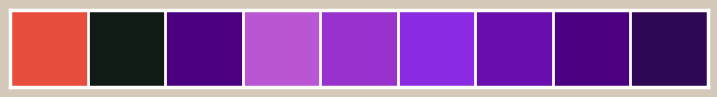

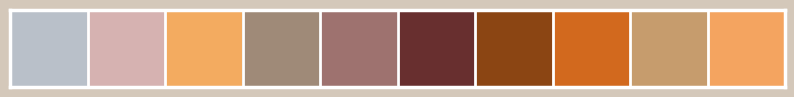

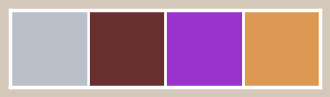

In [ ]:
sns.set_style("white")
sns.set(rc={"axes.facecolor":"#D4C8BA","figure.facecolor":"#D4C8BA"})
sns.set_context("poster",font_scale = .7)

palette = ["#E74C3C","#101B15","#4B0082","#BA55D3", "#9932CC", "#8A2BE2", "#6A0DAD", "#4B0082", "#2E0854"]
#palette_cmap = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
palette_cmap = ["#B9C0C9","#D6B2B1","#F3AB60","#9F8A78","#9E726F","#682F2F", "#8B4513", "#D2691E", "#C69C6D", "#F4A460"]
cluster = ["#B9C0C9","#682F2F","#9932CC","#DD9954"]

sns.palplot(sns.color_palette(palette))
sns.palplot(sns.color_palette(palette_cmap))
sns.palplot(sns.color_palette(cluster))
plt.show()

#682F2F #585858

**Customers Age Distribution**

### Let's have a look at the distribution of customer's age :

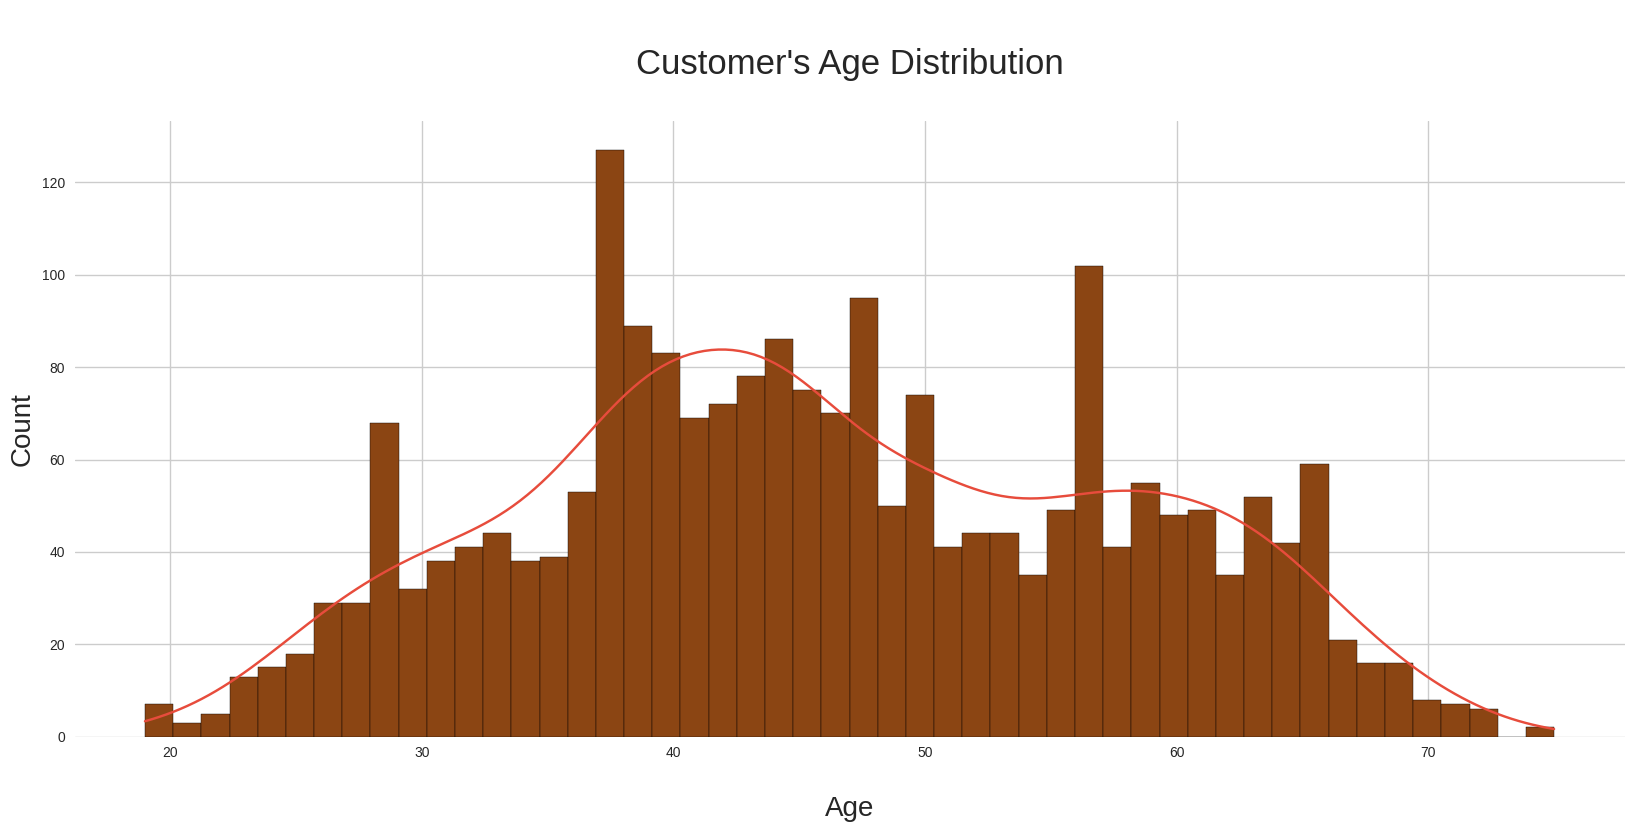

In [ ]:
display(Markdown("### Let's have a look at the distribution of customer's age :"))
plt.subplots(figsize=(20, 8))

# Set the histogram bars to dark purple
p = sns.histplot(data["Age"], color="#8B4513", kde=True, bins=50, alpha=1, fill=True, edgecolor="black")  # Dark purple

# Change the KDE line color (you can adjust this as desired)
p.axes.lines[0].set_color("#E74C3C")  # You can change this to any other color you prefer

# Set title and labels
p.axes.set_title("\nCustomer's Age Distribution\n", fontsize=25)
plt.ylabel("Count", fontsize=20)
plt.xlabel("\nAge", fontsize=20)

# Remove spines
sns.despine(left=True, bottom=True)

plt.show()

**Insights:**

* The age distribution shows multiple peaks, indicating that our customers belong to several distinct age groups.
* Key age clusters appear around ages 30 and 50, suggesting we have significant customer segments in these age ranges.
* This insight allows us to consider age-specific preferences, potentially helping us customize products or services for each age group.
* Most of the customers are from 36 to 50.


**Customers income spending distribution**

### Let's have a look on the distribution of customer's income and spending :

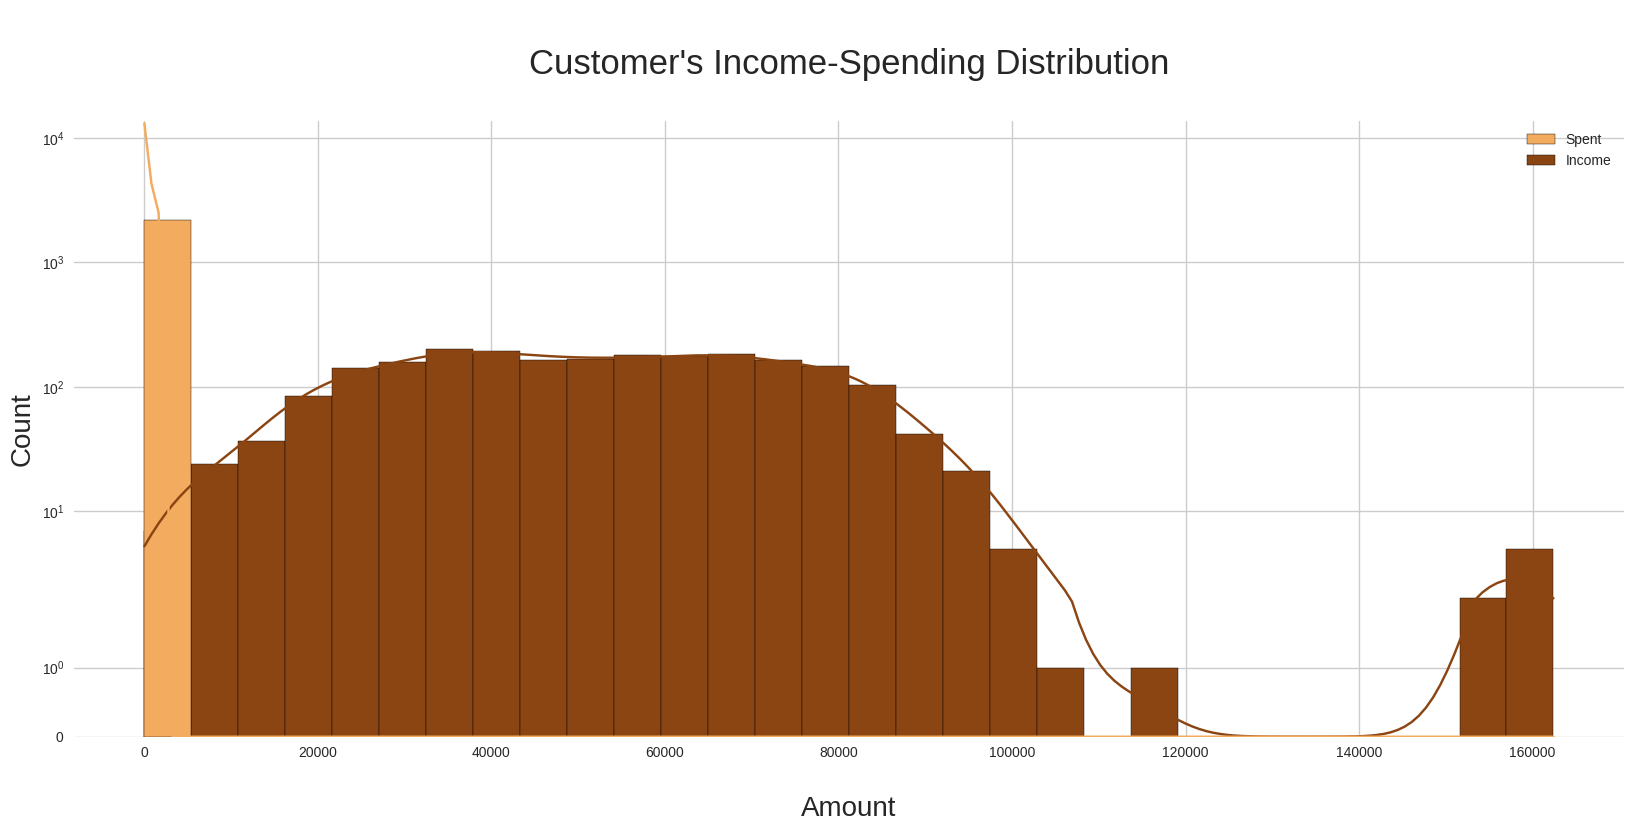

In [ ]:
display(Markdown("### Let's have a look on the distribution of customer's income and spending :"))
plt.subplots(figsize=(20, 8))
p = sns.histplot(data[["Spent","Income"]],palette=["#F3AB60","#8B4513"],kde=True,bins=30,alpha=1,fill=True,edgecolor="black")
#p.axes.lines[0].set_color(palette[0])
#p.axes.lines[1].set_color(palette[0])
p.axes.set_yscale("symlog")
p.axes.set_title("\nCustomer's Income-Spending Distribution\n",fontsize=25)
plt.ylabel("Count",fontsize=20)
plt.xlabel("\nAmount",fontsize=20)
sns.despine(left=True, bottom=True)

plt.show()

**Insight**


*   Income distribution between 10,000 and 100,000.
*   The spending distribution is highly skewed towards lower values, as indicated by the large spike on the left side.
*   Most customers have lower spending amounts compared to their income, with only a small group showing very high income.
*   The overall pattern might suggest that customers are conservative with their spending relative to their income or that only a subset of customers have high purchasing power.

**Customers Education Level**

###Let's have a look on the customer's education :

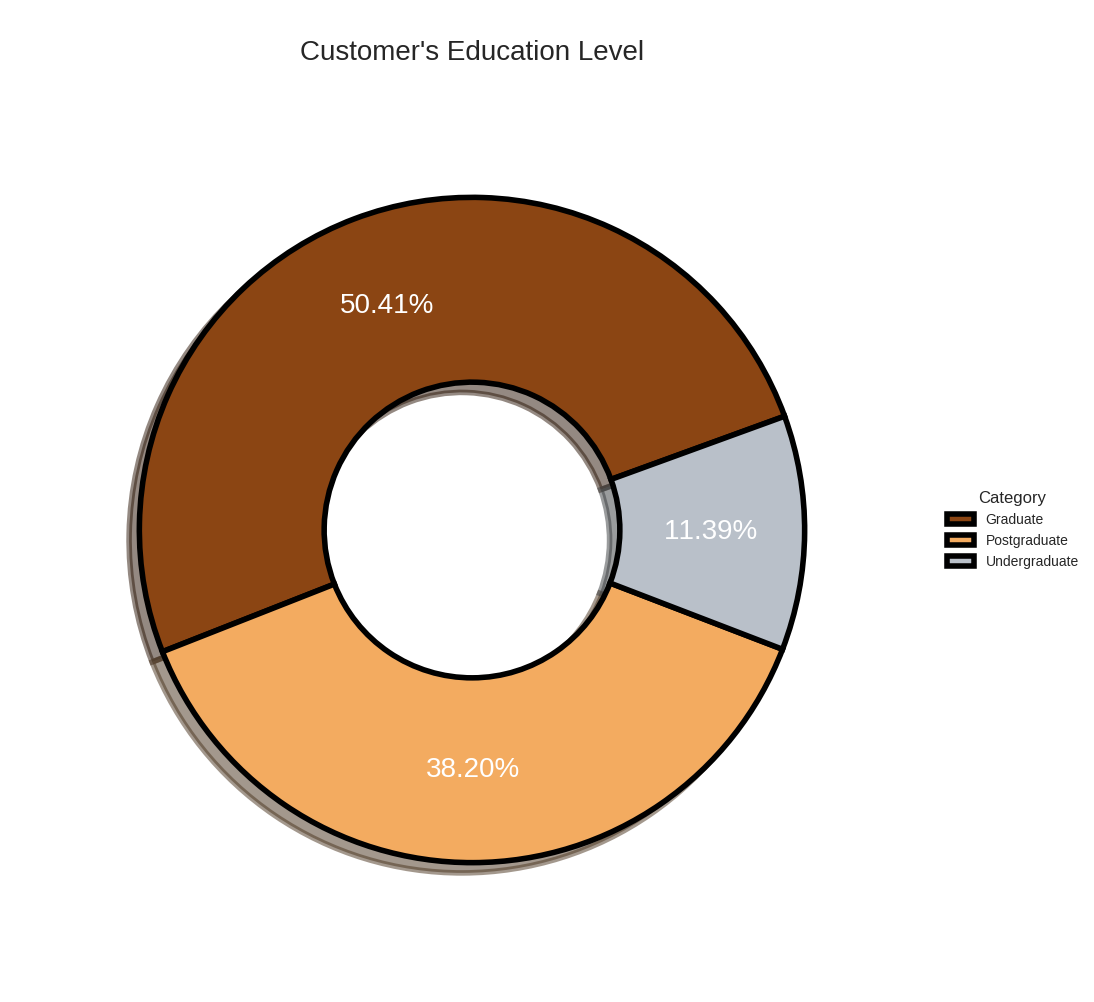

In [ ]:
display(Markdown("###Let's have a look on the customer's education :"))
plt.subplots(figsize=(12, 12))

labels = "Graduate","Postgraduate","Undergraduate"
size = 0.5

wedges, texts, autotexts = plt.pie([data["Education"].value_counts()[0],
                                    data["Education"].value_counts()[1],
                                    data["Education"].value_counts()[2]],
                                    explode = (0,0,0),
                                    textprops=dict(size= 20, color= "white"),
                                    autopct="%.2f%%",
                                    pctdistance = 0.72,
                                    radius=.9,
                                    colors = ["#8B4513", "#F3AB60", "#B9C0C9"] ,
                                    shadow = True,
                                    wedgeprops=dict(width = size, edgecolor = "black",
                                    linewidth = 4),
                                    startangle = 20)

plt.legend(wedges, labels, title="Category",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1), edgecolor = "black")
plt.title("\nCustomer's Education Level",fontsize=20)
plt.show()

**Insight**

*   The customer base is highly educated, with most customers holding at least a graduate degree, and over one-third having completed postgraduate studies.
*   This distribution suggests that the company serves an educated audience, potentially implying a preference for products or services that appeal to this demographic.



###Let's have a look on the distribution of customer's income and spending on basis of education level :

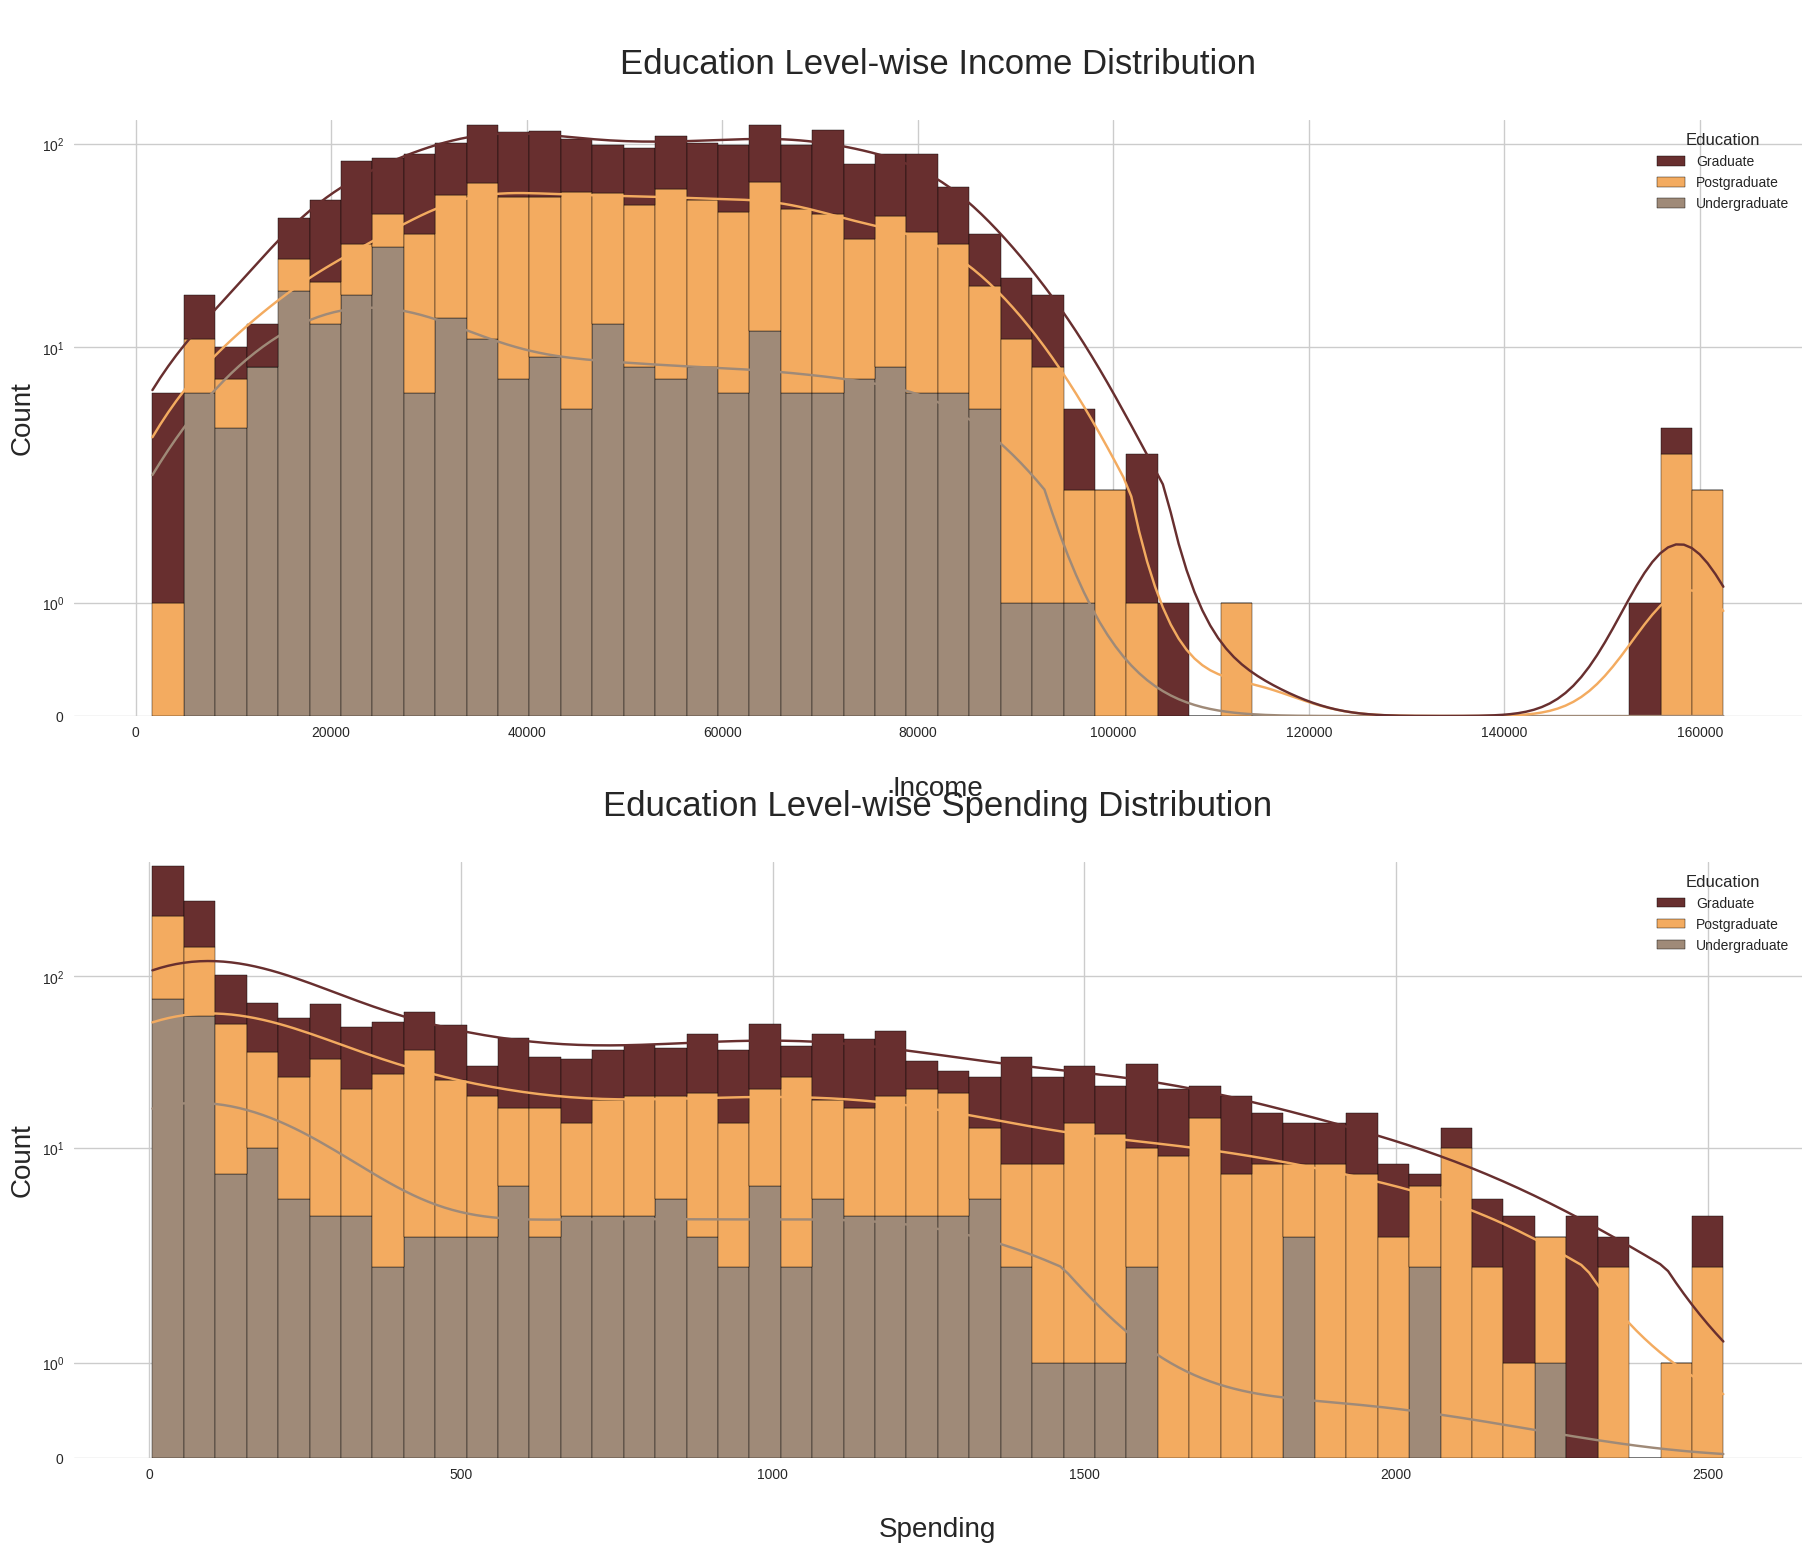

In [ ]:
display(Markdown("###Let's have a look on the distribution of customer's income and spending on basis of education level :"))

_, axes = plt.subplots(2,1,figsize=(20,16),sharex=False)
plt.tight_layout(pad=7.0)

sns.histplot(data=data,x="Income",hue="Education",multiple="stack",palette=["#682F2F","#F3AB60","#9F8A78"],ax=axes[0],kde=True,bins=50,alpha=1,fill=True,edgecolor="black")
#axes[0].lines[0].set_color(palette[0])
#axes[0].lines[1].set_color(palette[0])
#axes[0].lines[2].set_color(palette[0])
axes[0].set_yscale("symlog")
axes[0].set_title("\nEducation Level-wise Income Distribution\n",fontsize=25)
axes[0].set_ylabel("Count",fontsize=20)
axes[0].set_xlabel("\nIncome",fontsize=20)

sns.histplot(data=data,x="Spent",hue="Education",multiple="stack",palette=["#682F2F","#F3AB60","#9F8A78"],ax=axes[1],kde=True,bins=50,alpha=1,fill=True,edgecolor="black")
#axes[1].lines[0].set_color(palette[0])
#axes[1].lines[1].set_color(palette[0])
#axes[1].lines[2].set_color(palette[0])
axes[1].set_yscale("symlog")
axes[1].set_title("\nEducation Level-wise Spending Distribution\n",fontsize=25)
axes[1].set_ylabel("Count",fontsize=20)
axes[1].set_xlabel("\nSpending",fontsize=20)

sns.despine(left=True, bottom=True)
plt.show()

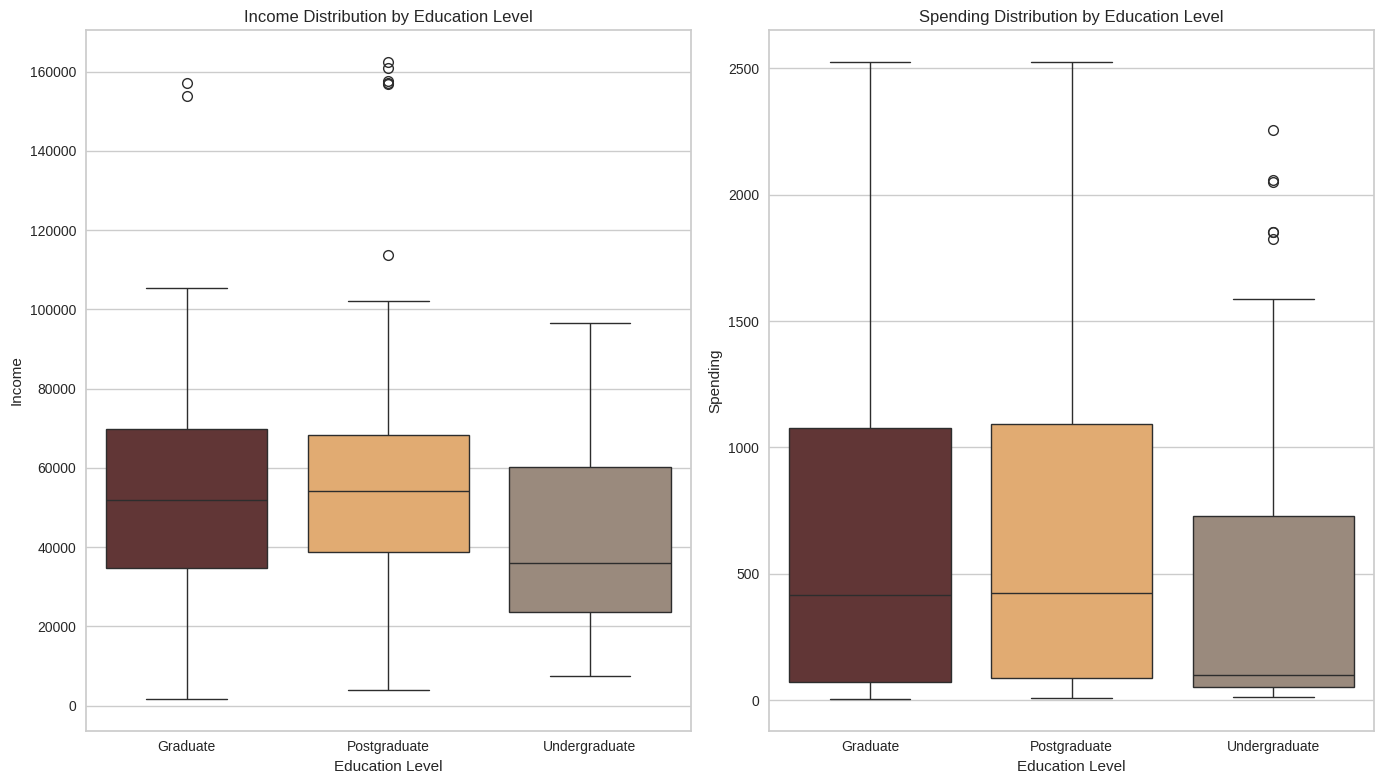

In [ ]:
plt.figure(figsize=(14, 8))

# Income Box Plot
plt.subplot(1, 2, 1)
sns.boxplot(data=data, x='Education', y='Income', palette=["#682F2F", "#F3AB60", "#9F8A78"])
plt.title("Income Distribution by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Income")

# Spending Box Plot
plt.subplot(1, 2, 2)
sns.boxplot(data=data, x='Education', y='Spent', palette=["#682F2F", "#F3AB60", "#9F8A78"])
plt.title("Spending Distribution by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Spending")

plt.tight_layout()
plt.show()

**Insights from the Graphs**

**Income Distribution:**

The income distribution appears skewed, with a concentration of individuals earning between $20,000 and  $80,000, especially for undergraduates.

Graduates and postgraduates tend to have higher income levels, as indicated by their extended presence at higher income brackets.

**Spending Distribution:**

Spending is distributed more uniformly across education levels, with most people spending below $1,500.

Higher education levels may correlate with increased spending power, but this effect appears less pronounced compared to income.

These insights suggest that education level may influence income significantly, while its impact on spending is more evenly distributed.

**Swarm plots to show the distribution of income and spending based on marital status (Alone, Couple) and parental status Yes or No**

###Let's have a look on the distribution of customer's income and spending on basis of marital and parental status :

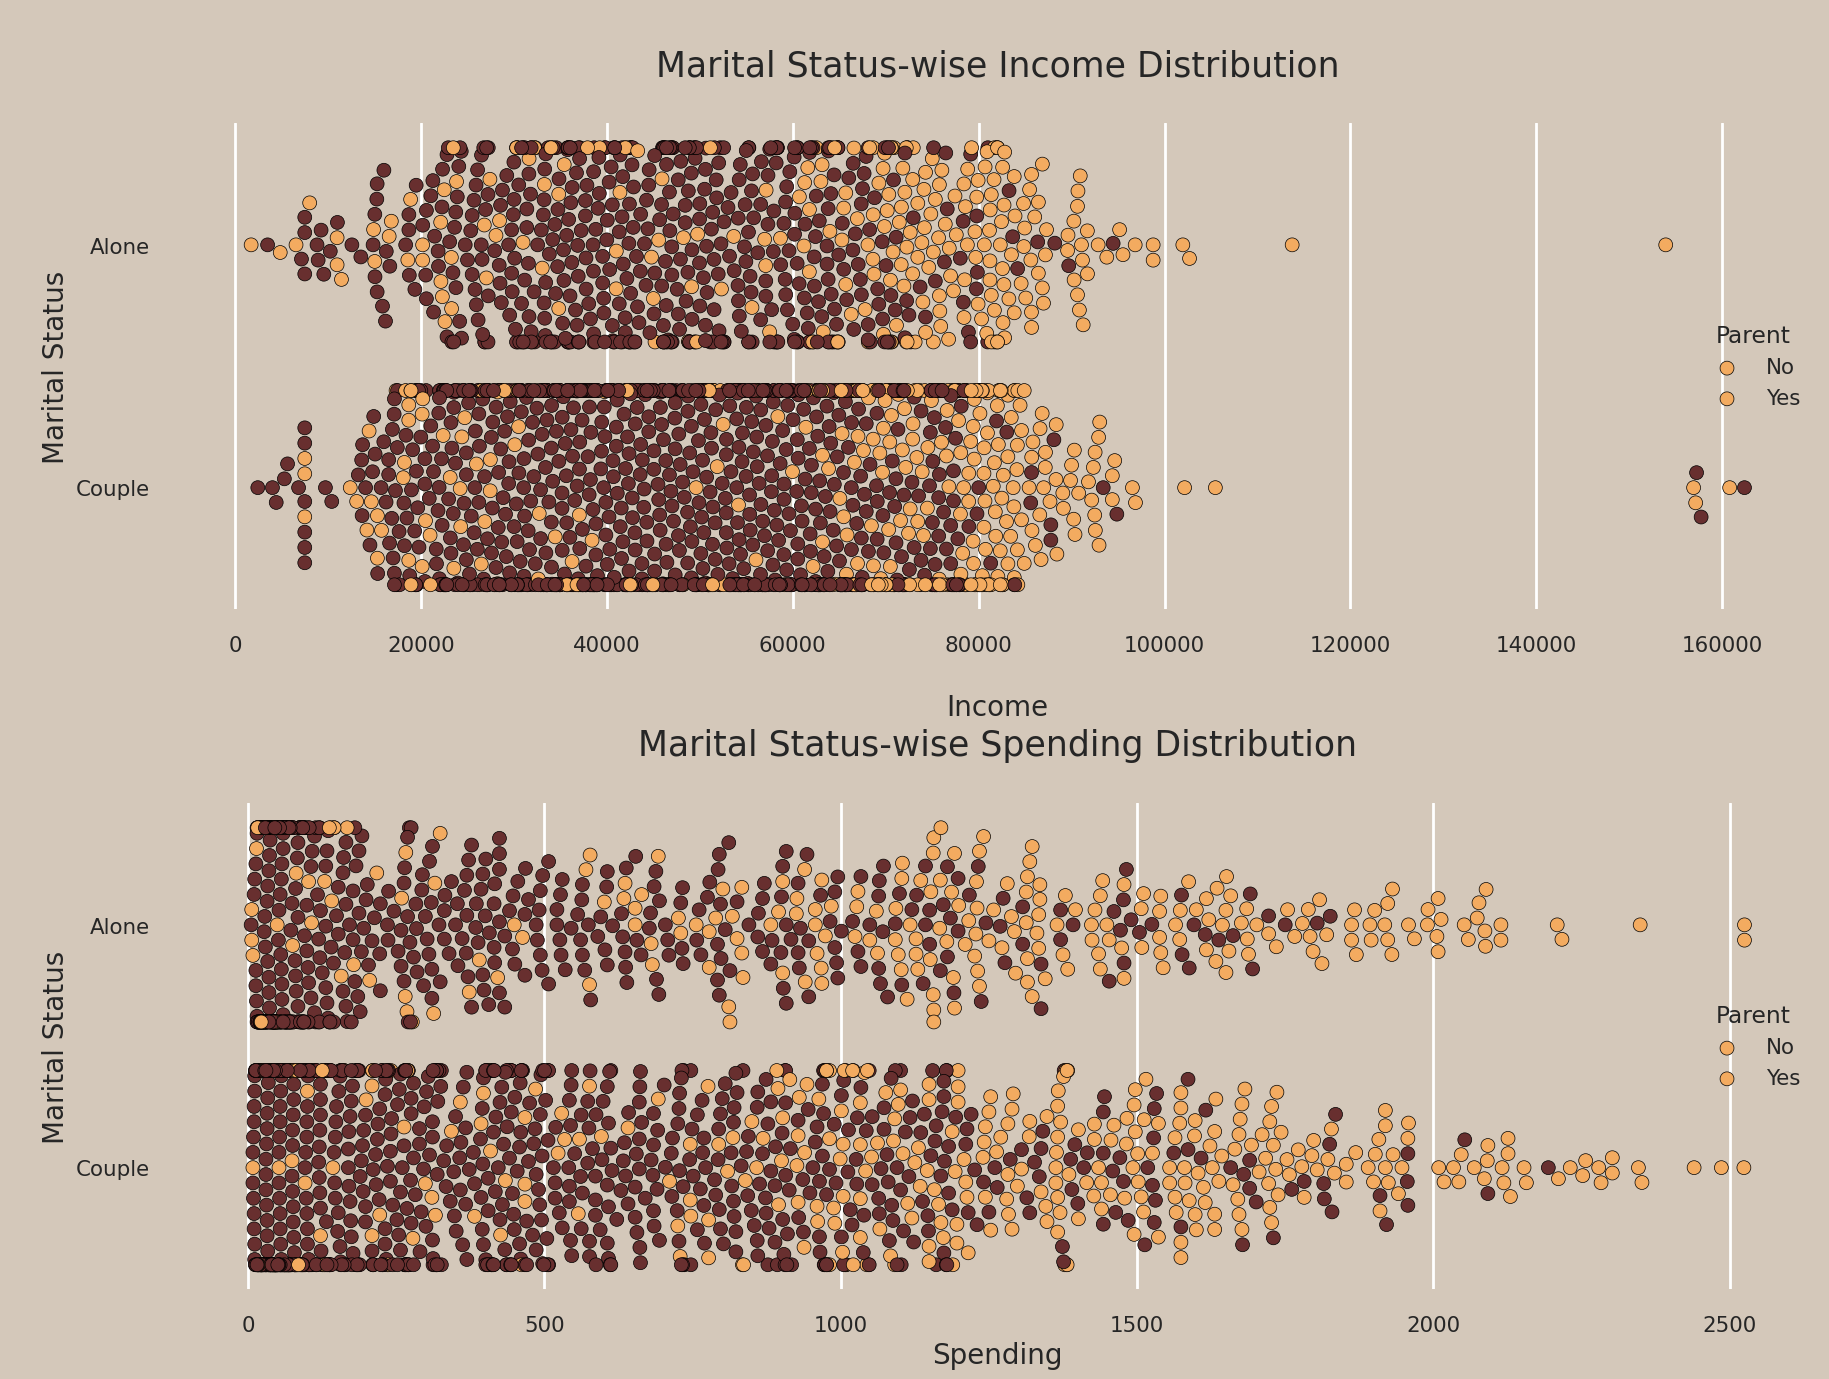

In [ ]:
display(Markdown("###Let's have a look on the distribution of customer's income and spending on basis of marital and parental status :"))

_, axes = plt.subplots(2,1,figsize=(20,15),sharex=False)
plt.tight_layout(pad=6.0)

# Swarmplot for Income Distribution by Marital and Parental Status
sns.swarmplot(x=data["Income"],y=data["Marital Status"],hue=data["Parental Status"],palette=["#F3AB60","#682F2F"],ax=axes[0],marker="o",size=10,alpha=1,linewidth=0.5,edgecolor="black")
axes[0].legend(["No","Yes"],title="Parent", edgecolor = "#1c1c1c",loc="center right")
axes[0].set_title("\nMarital Status-wise Income Distribution\n",fontsize=25)
axes[0].set_xlabel("\nIncome",fontsize=20)
axes[0].set_ylabel("\nMarital Status",fontsize=20)

# Swarmplot for Spending Distribution by Marital and Parental Status
sns.swarmplot(x=data["Spent"],y=data["Marital Status"],hue=data["Parental Status"],palette=["#F3AB60","#682F2F"],ax=axes[1],marker="o",size=10,alpha=1,linewidth=0.5,edgecolor="black")
axes[1].legend(["No","Yes"],title="Parent", edgecolor = "#1c1c1c",loc="center right")
axes[1].set_title("\nMarital Status-wise Spending Distribution\n",fontsize=25)
axes[1].set_xlabel("Spending",fontsize=20)
axes[1].set_ylabel("\nMarital Status",fontsize=20)



sns.despine(left=True, bottom=True)
plt.show()

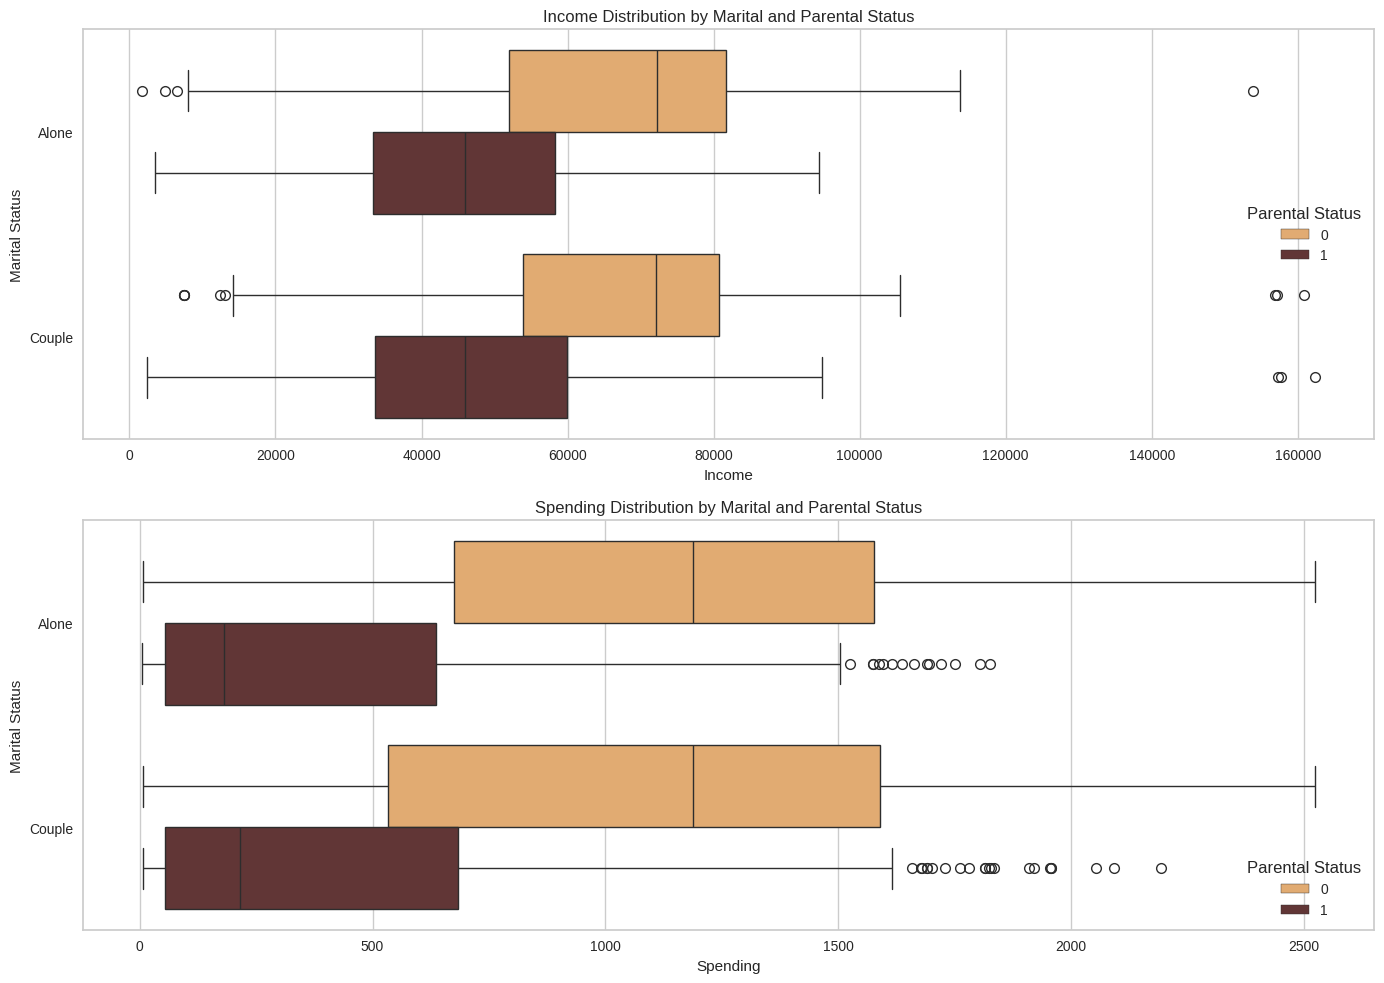

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 10))

# Income Distribution by Marital and Parental Status
plt.subplot(2, 1, 1)
sns.boxplot(data=data, x="Income", y="Marital Status", hue="Parental Status", palette=["#F3AB60", "#682F2F"])
plt.title("Income Distribution by Marital and Parental Status")
plt.xlabel("Income")
plt.ylabel("Marital Status")

# Spending Distribution by Marital and Parental Status
plt.subplot(2, 1, 2)
sns.boxplot(data=data, x="Spent", y="Marital Status", hue="Parental Status", palette=["#F3AB60", "#682F2F"])
plt.title("Spending Distribution by Marital and Parental Status")
plt.xlabel("Spending")
plt.ylabel("Marital Status")

plt.tight_layout()
plt.show()


**Insights from the Plots**

**Income Distribution:**

Couples generally show a wider and higher income distribution compared to individuals who are alone, indicating that couples may tend to have higher incomes.

There is some variation in income distribution based on parental status, with a slightly broader spread for parents within each marital status group.

**Spending Distribution:**

Spending tends to be more spread out among couples, indicating potentially higher spending capacity than those who are alone.

The parental status doesn’t seem to create as much of a clear division in spending patterns as it does for income.

These plots provide a clear visual comparison of income and spending patterns across marital and parental statuses.


###Let's have a look on the distribution of customer's children :

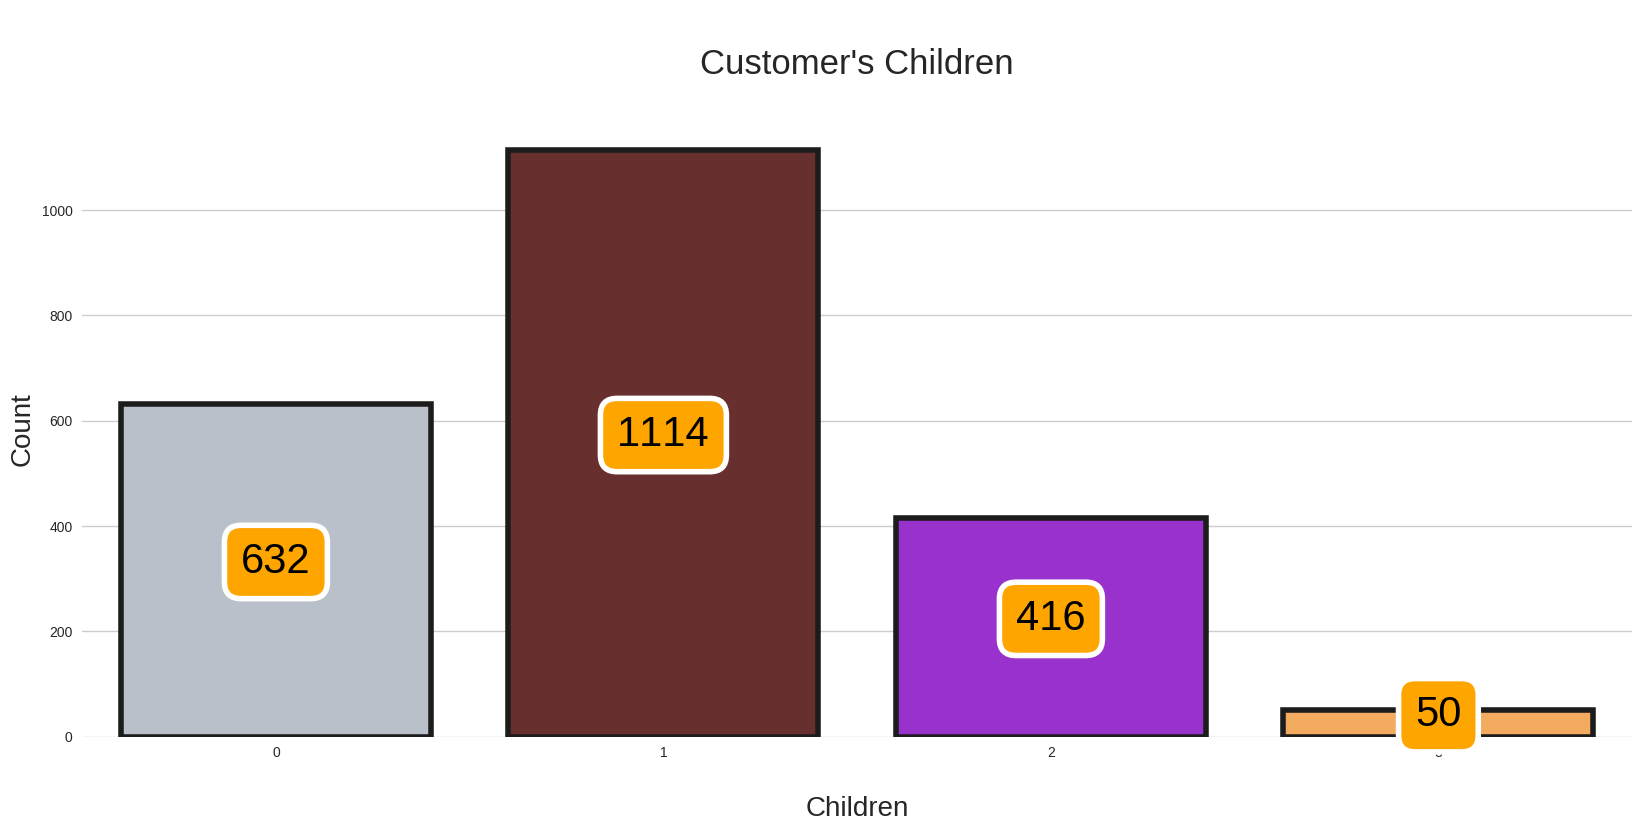

In [ ]:
display(Markdown("###Let's have a look on the distribution of customer's children :"))
plt.subplots(figsize=(20, 8))
p = sns.countplot(x=data["Children"],palette=["#B9C0C9","#682F2F", "#9932CC","#F3AB60"], saturation=1,edgecolor = "#1c1c1c", linewidth = 4)
p.axes.set_yscale("linear")
p.axes.set_title("\nCustomer's Children\n",fontsize=25)
p.axes.set_ylabel("Count",fontsize=20)
p.axes.set_xlabel("\nChildren",fontsize=20)
p.axes.set_xticklabels(p.get_xticklabels(),rotation = 0)
for container in p.containers:
    p.bar_label(container,label_type="center",padding=6,size=30,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "white", "linewidth" : 4, "alpha": 1})


sns.despine(left=True, bottom=True)
plt.show()

**Insights:**
*   632 customers have no child.
*  Most of the customers have one child.
*  416 customers have two child.
*  50 customers have three child.

##Correlation map

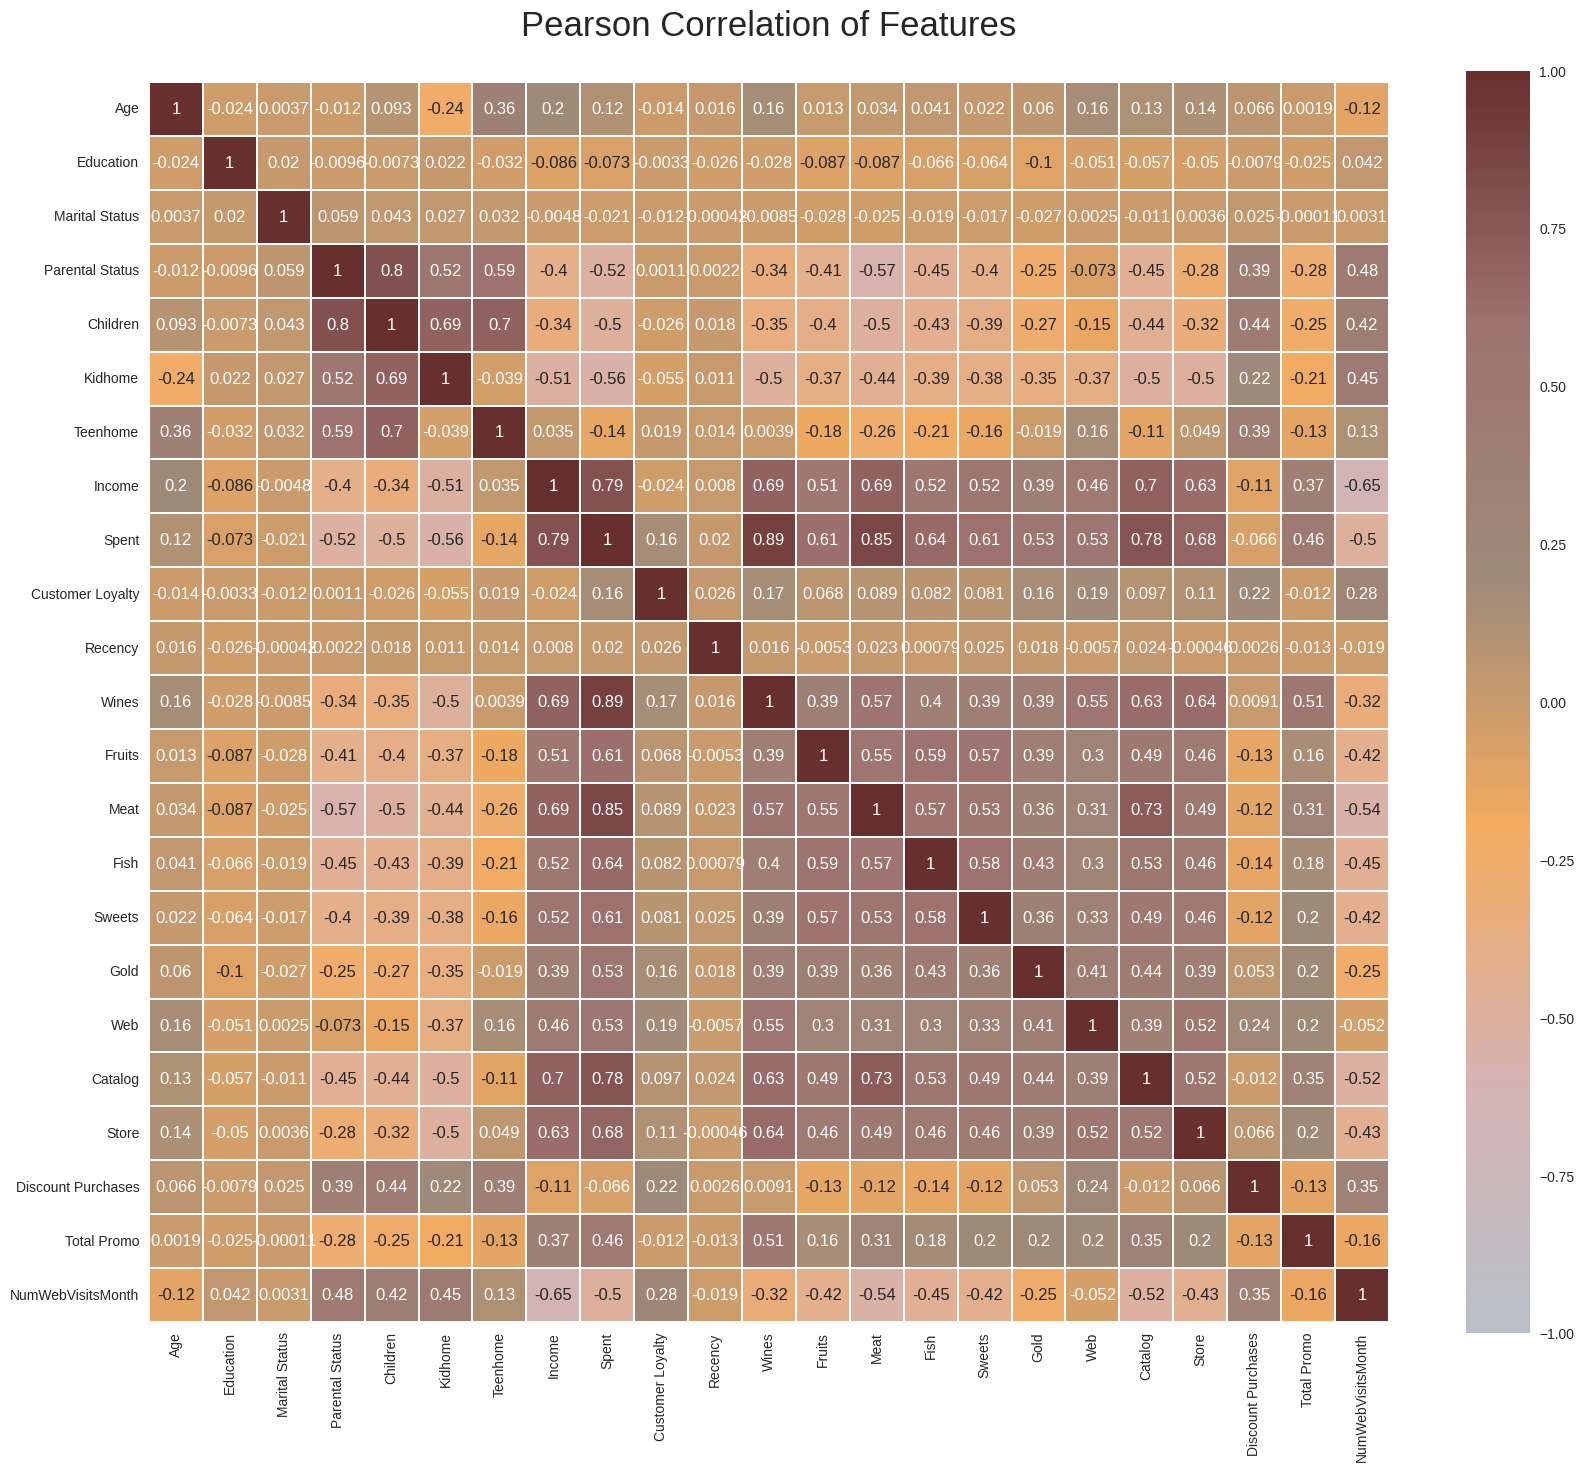

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from sklearn.preprocessing import LabelEncoder

# Define the color palette
palette_cmap = LinearSegmentedColormap.from_list("purple_brown_map", ["#B9C0C9", "#D6B2B1", "#F3AB60", "#9F8A78", "#9E726F", "#682F2F"])

# Encode categorical columns
catcol = ["Education", "Marital Status"]
le = LabelEncoder()
for col in catcol:
    data[col] = le.fit_transform(data[col])

# Plotting the heatmap
plt.subplots(figsize=(20, 20))
sns.heatmap(data.drop(columns="ID").corr(), cmap=palette_cmap, square=True,
            cbar_kws=dict(shrink=.82), annot=True, vmin=-1, vmax=1,
            linewidths=0.1, linecolor="white", annot_kws=dict(fontsize=12))

plt.title("Pearson Correlation of Features\n", fontsize=25)
plt.xticks(rotation=90)
plt.show()


**Insights:**

* High correlation between customer's income and spending. Also high correlation between buying wine, meat and buying through catalog and stores with income and spending.
* High correlation between buying meat and buying through catalog.

##Dimenisonality reduction

**scaling the dataset using standardscaler**

In [ ]:
from sklearn.preprocessing import StandardScaler
dataC = data
scaler = StandardScaler()
dataC = scaler.fit_transform(dataC)
scaled_data = pd.DataFrame(dataC, columns= data.columns)
display(Markdown("###After scaling, let's have a glimpse of the scaled dataset :"))
scaled_data.head().style.set_properties(**{"background-color": "#8B4513","color":"#FFFFFF","border": "1.5px solid black"})


###After scaling, let's have a glimpse of the scaled dataset :

### Applying PCA Transformation
**PCA reduce the dataset to 3 principal components**

In [ ]:
scaled_dataC = scaled_data
pca = PCA(n_components = 3,random_state = 42)
scaled_dataC = pca.fit_transform(scaled_dataC)
pca_data = pd.DataFrame(scaled_dataC, columns=["col1","col2", "col3"])

display(Markdown("###Let's have a glimpse of the PCA transformed dataset :"))
pca_data.head(15).T.style.set_properties(**{"background-color": "#8B4513","color":"#FFFFFF","border": "1.5px solid black"})

###Let's have a glimpse of the PCA transformed dataset :

In [ ]:
!pip install plotly
import plotly.graph_objects as go
import plotly.io as pio


In [ ]:
pio.renderers.default = 'colab'


In [ ]:
x = pca_data["col1"]
y = pca_data["col2"]
z = pca_data["col3"]
display(Markdown("###Let's have a look on the dataset after dimensionality reduction :"))

fig = go.Figure(data = [go.Scatter3d(x=x, y=y, z=z,mode='markers',
                marker = dict(size=10, color="#682F2F", opacity=0.8))])
fig.update_layout(title=dict(text= "Dataset After Diemsionality Reduction[3D Projection]",
                             y=0.97,x=0.5,xanchor= "center",yanchor= "top",font_color="black"),
                  scene=dict(xaxis = dict(title="col1",backgroundcolor="#D4C8BA",showbackground=True,showgrid=True, gridwidth=2, gridcolor='white',zerolinecolor="white"),
                             yaxis = dict(title="col2",backgroundcolor="#D4C8BA",showbackground=True,showgrid=True, gridwidth=2, gridcolor='white',zerolinecolor="white"),
                             zaxis = dict(title="col3",backgroundcolor="#D4C8BA",showbackground=True,showgrid=True, gridwidth=2, gridcolor='white',zerolinecolor="white")),
                  margin=dict(l=0, r=0, b=0, t=0),paper_bgcolor="#D4C8BA")
fig.show()

###Let's have a look on the dataset after dimensionality reduction :

**Insight**
*   This 3D plot offers a high-level view of the dataset in a reduced-dimensional space. It suggests a general clustering trend with some potential outliers, indicating that the majority of the data can be well-represented by three principal components.
*   Further analysis can help refine insights, especially if you investigate clustering patterns or examine the contribution of each component to the data's variance.



##Customer segementation

###Elbow Method for determining the number of clusters :

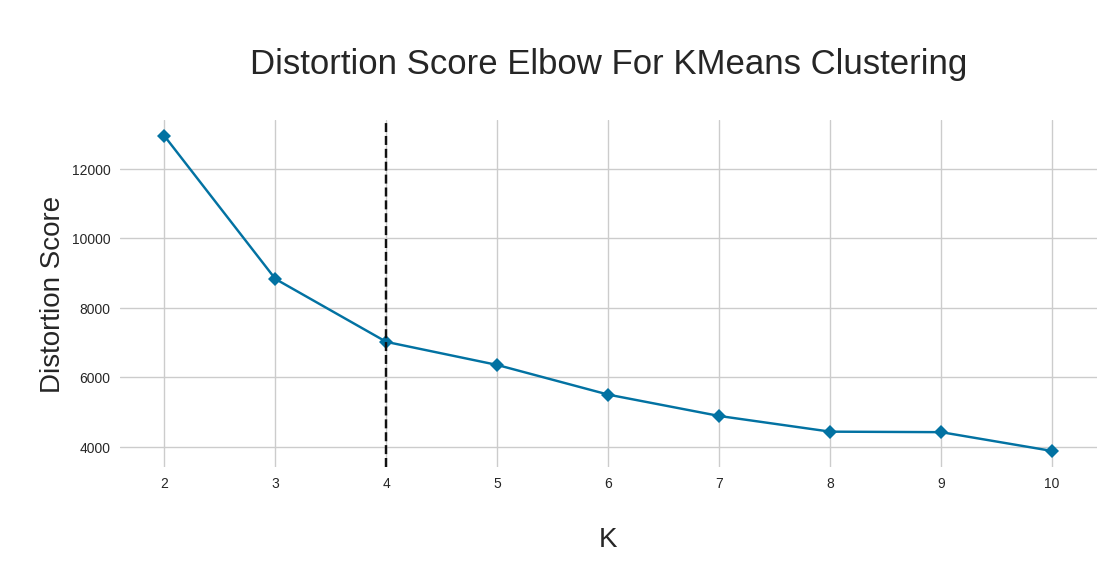

In [ ]:
display(Markdown("###Elbow Method for determining the number of clusters :"))
_, axes = plt.subplots(figsize=(20,8))

elbow = KElbowVisualizer(KMeans(), k=10, timings=False, locate_elbow=True, size=(1260,450))
elbow.fit(scaled_dataC)

axes.set_title("\nDistortion Score Elbow For KMeans Clustering\n",fontsize=25)
axes.set_xlabel("\nK",fontsize=20)
axes.set_ylabel("\nDistortion Score",fontsize=20)

sns.despine(left=True, bottom=True)
plt.show()

**Insight**

*   The plot suggests that 4 clusters should be used for this dataset, as it balances compactness low distortion with simplicity fewer clusters.


In [ ]:
km = KMeans(n_clusters = 4,random_state = 42)
# ac = AgglomerativeClustering(n_clusters=4)

y_km = km.fit_predict(pca_data)
pca_data["Clusters"] = y_km
data["Clusters"]= y_km

###Let's have a look on the customers quantity distribution after clustering :

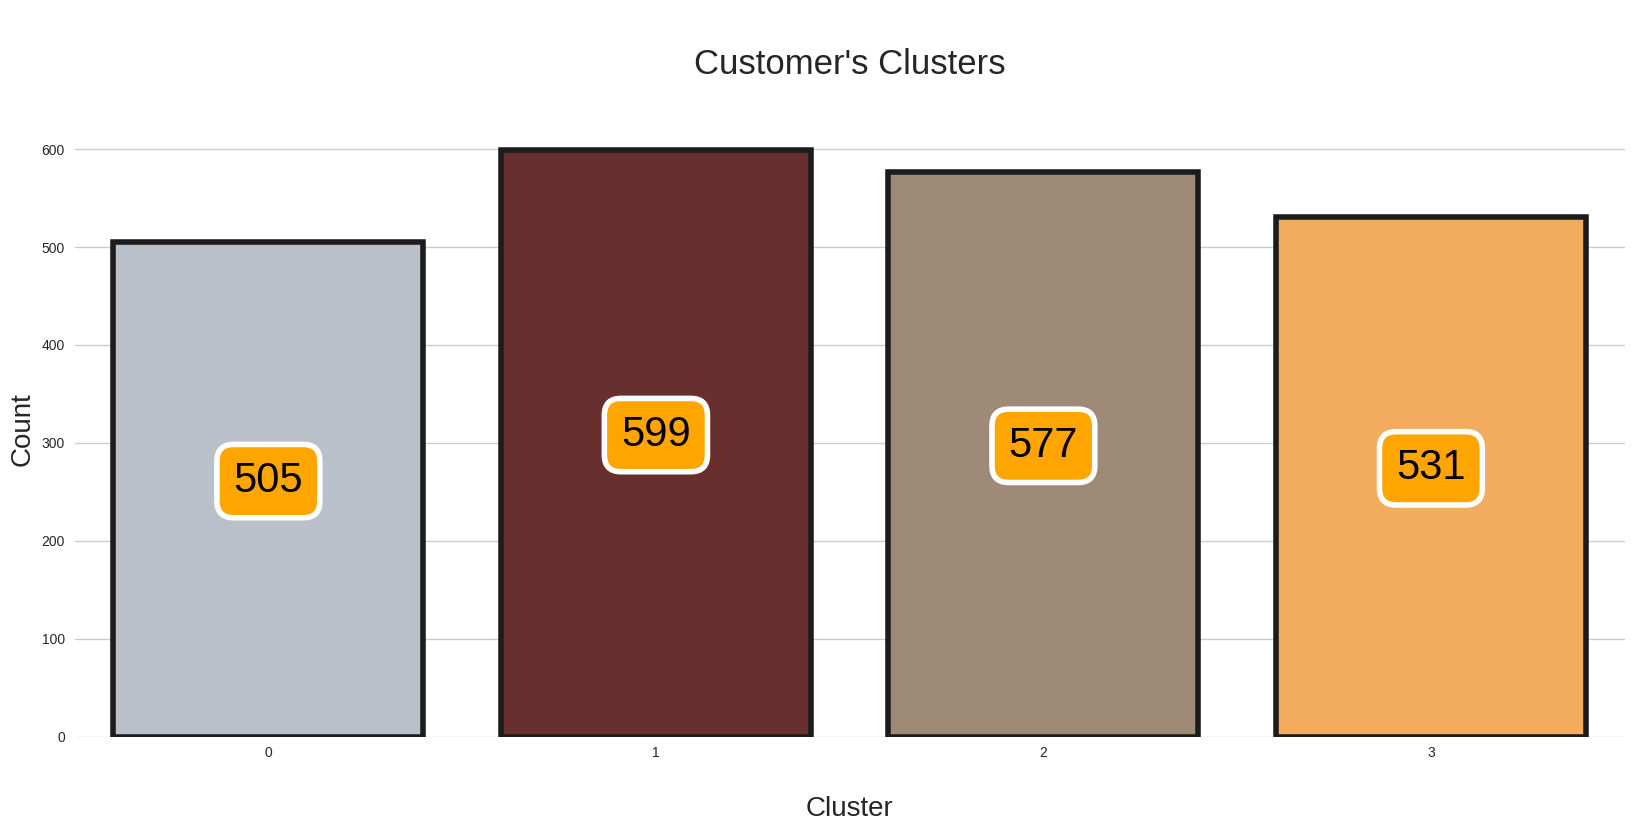

In [ ]:
display(Markdown("###Let's have a look on the customers quantity distribution after clustering :"))

plt.subplots(figsize=(20, 8))
p = sns.countplot(x=data["Clusters"],palette=["#B9C0C9","#682F2F","#9F8A78","#F3AB60"], saturation=1,edgecolor = "#1c1c1c", linewidth = 4)
p.axes.set_yscale("linear")
p.axes.set_title("\nCustomer's Clusters\n",fontsize=25)
p.axes.set_ylabel("Count",fontsize=20)
p.axes.set_xlabel("\nCluster",fontsize=20)
p.axes.set_xticklabels(p.get_xticklabels(),rotation = 0)
for container in p.containers:
    p.bar_label(container,label_type="center",padding=6,size=30,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "white", "linewidth" : 4, "alpha": 1})


sns.despine(left=True, bottom=True)
plt.show()

**Insights**

Each cluster is labeled with the count of customers within it, allowing stakeholders to quickly understand how many customers belong to each group.

The color coding provides a visually appealing way to distinguish clusters.

In [ ]:
display(Markdown("###Let's have a look on the dataset after clustering :"))

fig = go.Figure(data = [go.Scatter3d(x=x, y=y, z=z,mode='markers',
                marker = dict(size=10, color=pca_data["Clusters"],colorscale=["#B9C0C9","#682F2F", "#9F8A78","#F3AB60"], opacity=1))])
fig.update_layout(title=dict(text= "Dataset After Clustering[3D Projection]",
                             y=0.97,x=0.5,xanchor= "center",yanchor= "top",font_color="black"),
                  scene=dict(xaxis = dict(title="col1",backgroundcolor="#D4C8BA",showbackground=True,showgrid=True, gridwidth=2, gridcolor='white',zerolinecolor="white"),
                             yaxis = dict(title="col2",backgroundcolor="#D4C8BA",showbackground=True,showgrid=True, gridwidth=2, gridcolor='white',zerolinecolor="white"),
                             zaxis = dict(title="col3",backgroundcolor="#D4C8BA",showbackground=True,showgrid=True, gridwidth=2, gridcolor='white',zerolinecolor="white")),
                  margin=dict(l=0, r=0, b=0, t=0),paper_bgcolor="#D4C8BA")
fig.show()

###Let's have a look on the dataset after clustering :

**Insight from graph**
*   Cluster Sizes:

The bar plot shows the count of customers in each cluster:

Cluster 0 has 505 customers.

Cluster 1 has 599 customers.

Cluster 2 has 577 customers.

Cluster 3 has 531 customers.

This suggests that the clusters are relatively balanced, with each cluster containing between 500 and 600 customers.

*   Cluster Interpretation:
The distribution suggests that there are meaningful groupings in the data, as each cluster has a substantial number of members.
The color-coded bars give each cluster a distinct visual identity, helping to easily identify the quantity in each group.
  



###Let's have a look on the characteristics of the clusters on the basis of income and spending :

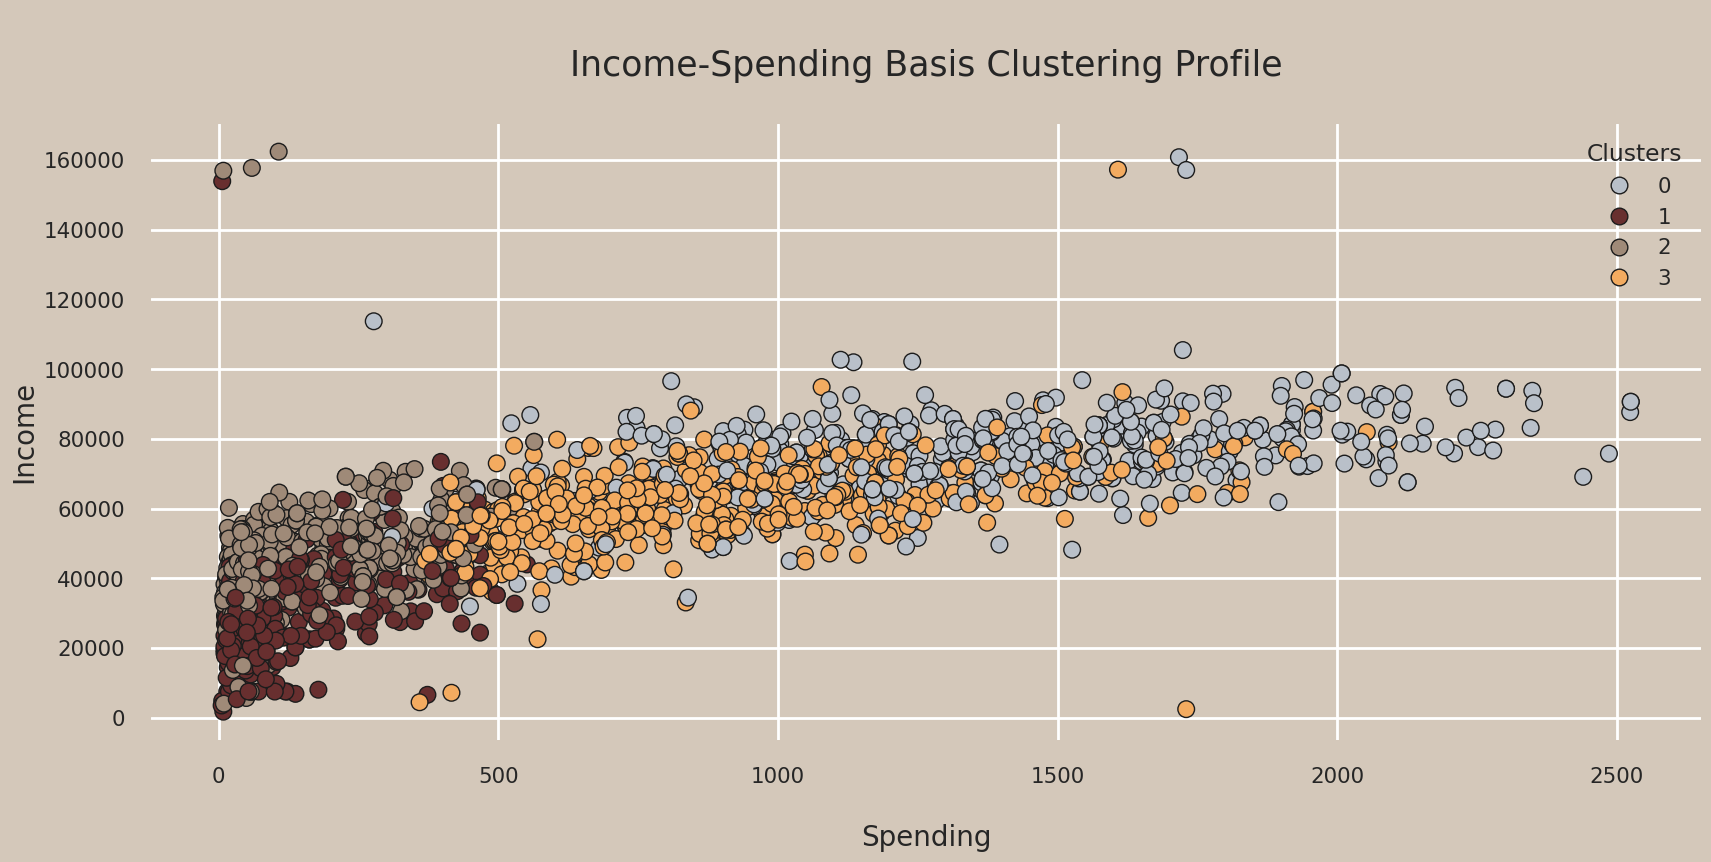

In [ ]:
display(Markdown("###Let's have a look on the characteristics of the clusters on the basis of income and spending :"))

_, axes = plt.subplots(figsize=(20,8))
sns.scatterplot(x=data["Spent"],y=data["Income"],hue=data["Clusters"],palette=["#B9C0C9","#682F2F", "#9F8A78","#F3AB60"],sizes=60, alpha=1,edgecolor = "#1c1c1c", linewidth = 1)
axes.set_title("\nIncome-Spending Basis Clustering Profile\n",fontsize=25)
axes.set_ylabel("Income",fontsize=20)
axes.set_xlabel("\nSpending",fontsize=20)

sns.despine(left=True, bottom=True)
plt.show()

**Insights from the Plot**

**Income vs. Spending Patterns:**

The clusters show distinct groupings. For example, clusters may have different spending habits at similar income levels or different income distributions for similar spending habits.

**Cluster 0:** This group has higher income and spending levels, indicating that these customers are potentially high-value customers.

**Cluster 1:** Shows lower spending and income, indicating a more budget-conscious or low-income group.

**Cluster 2 and  3 :** Represent middle-range spenders with varying income levels, possibly reflecting customers with moderate spending power.

This plot provides a straightforward way to visually differentiate the clusters based on spending and income, making it easier to identify target segments for marketing or strategic decisions.

###LLet's have a look on the characteristics of the clusters on the basis of spending :

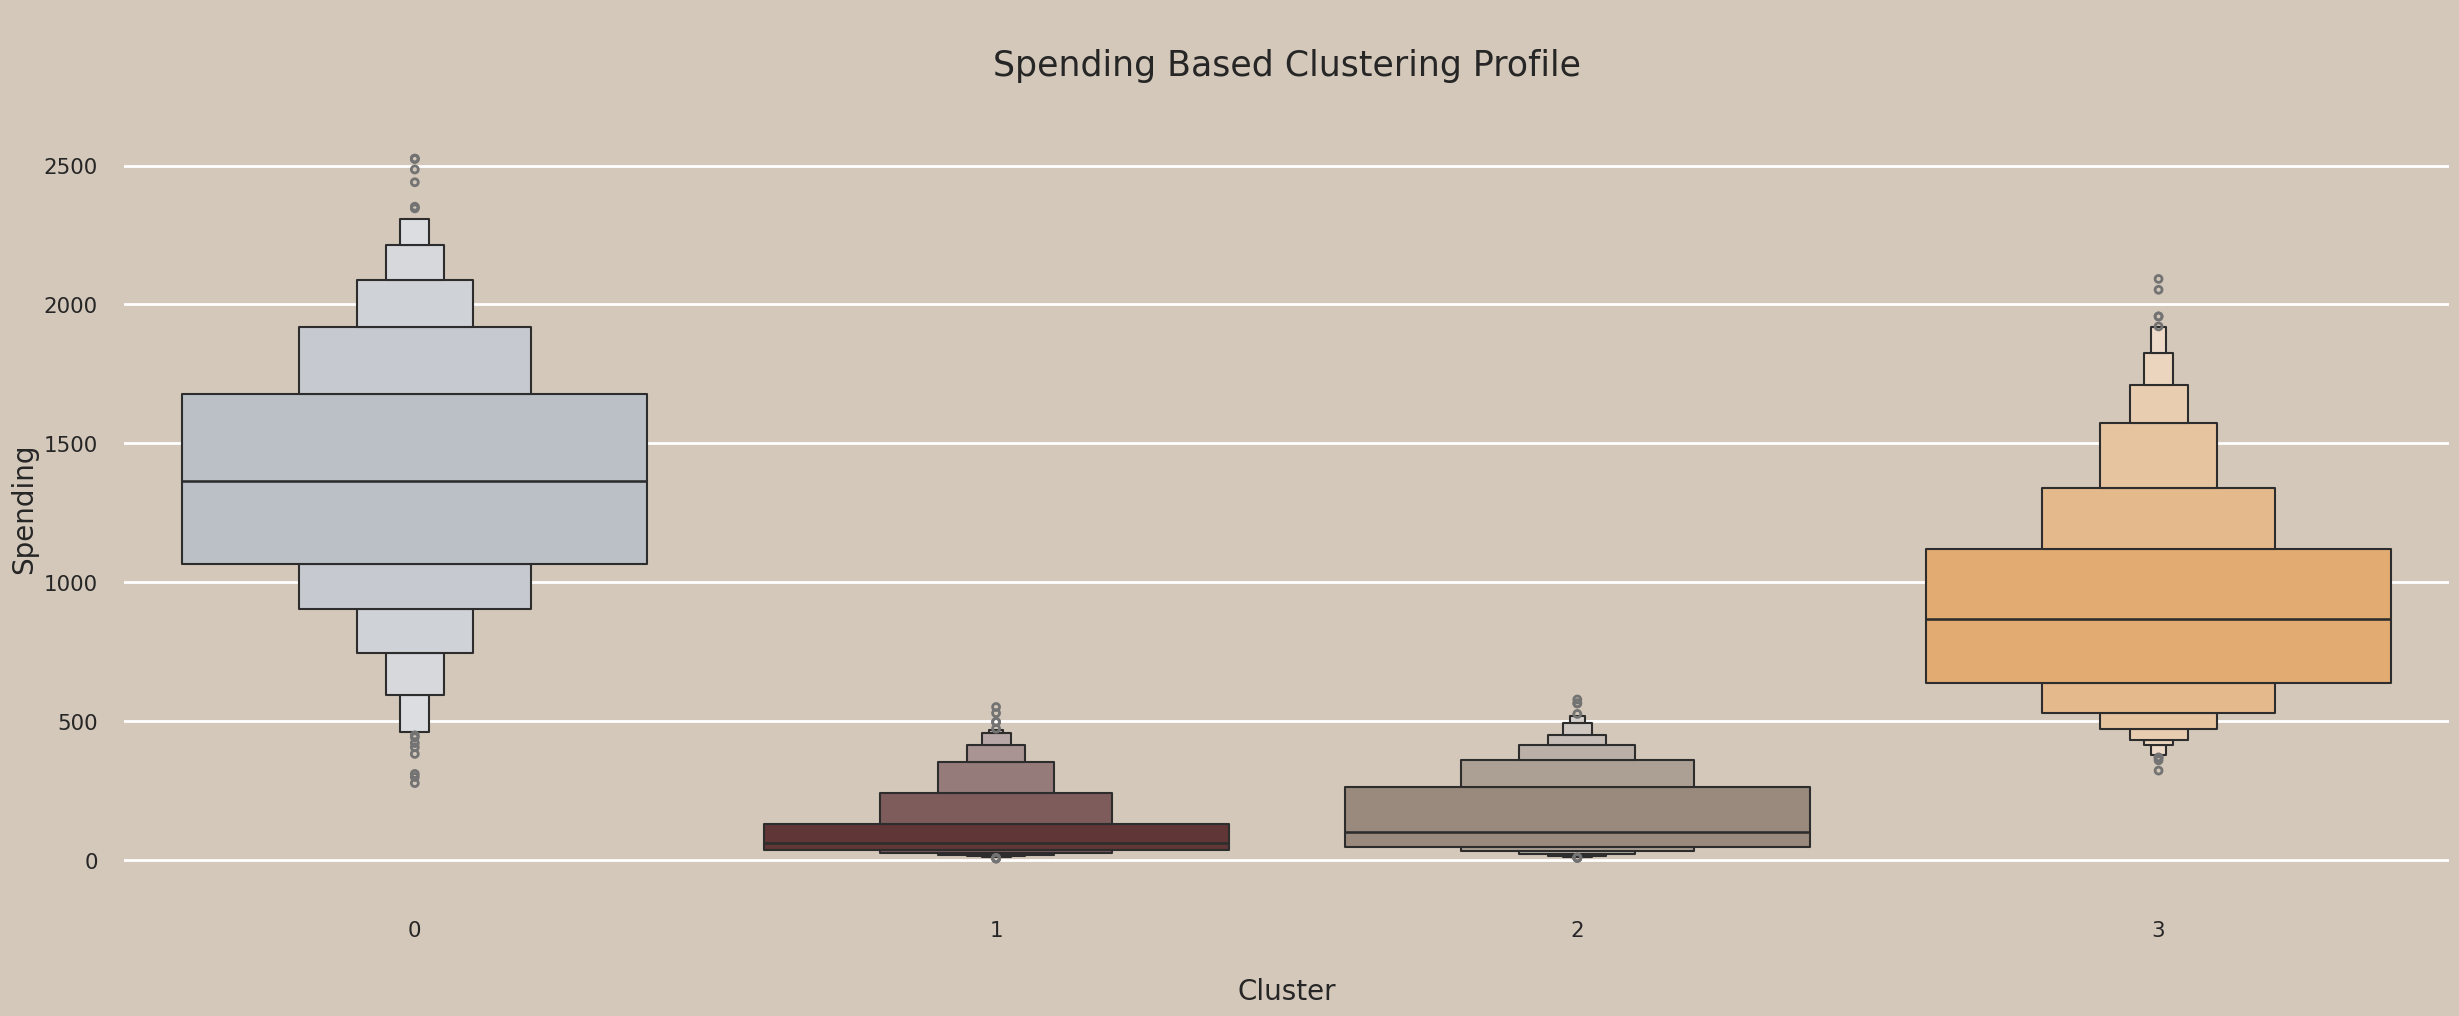

In [ ]:
display(Markdown("###LLet's have a look on the characteristics of the clusters on the basis of spending :"))

_, axes = plt.subplots(figsize=(30,10))
sns.boxenplot(x=data["Clusters"], y=data["Spent"], palette=["#B9C0C9","#682F2F", "#9F8A78","#F3AB60"])
# sns.swarmplot(x=data["Clusters"],y=data["Spent"],color="#B9C0C9",marker="o",size=10,alpha=0.6,linewidth=0,edgecolor="white")

axes.set_title("\nSpending Based Clustering Profile\n",fontsize=25)
axes.set_ylabel("Spending",fontsize=20)
axes.set_xlabel("\nCluster",fontsize=20)

sns.despine(left=True, bottom=True)
plt.show()

**Insights from the Plot**

**Cluster 0:** Has a wide spending range, indicating high variability in spending among members of this cluster. The median spending is higher compared to other clusters.

**Cluster 1:** Has a much narrower spending range, with lower median spending, suggesting a more consistent but low spending profile.

**Cluster 2:** Similar to Cluster 1, but with a slightly higher median spending and a broader range.

**Cluster 3:** Shows a wide distribution of spending similar to Cluster 0, with relatively high median spending and variability.

###Let's have a look on the characteristics of the clusters on the basis of accepting promotions :

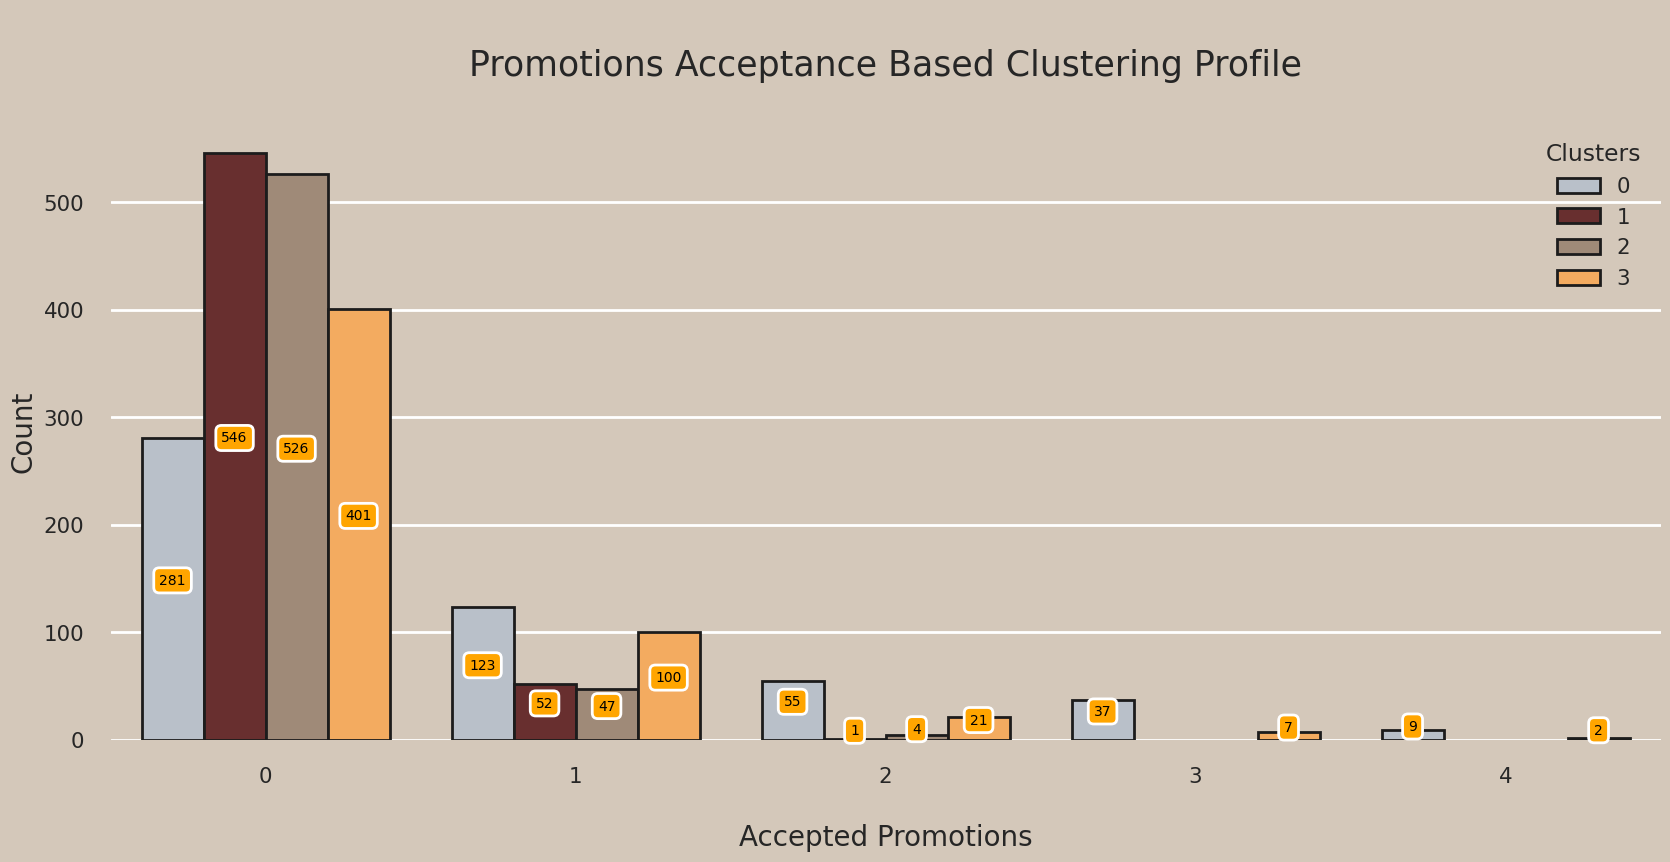

In [ ]:
display(Markdown("###Let's have a look on the characteristics of the clusters on the basis of accepting promotions :"))

plt.subplots(figsize=(20, 8))
p = sns.countplot(x=data["Total Promo"],hue=data["Clusters"],palette=["#B9C0C9","#682F2F", "#9F8A78","#F3AB60"], saturation=1,edgecolor = "#1c1c1c", linewidth = 2)
p.axes.set_yscale("linear")
p.axes.set_title("\nPromotions Acceptance Based Clustering Profile\n",fontsize=25)
p.axes.set_ylabel("Count",fontsize=20)
p.axes.set_xlabel("\nAccepted Promotions",fontsize=20)
p.axes.set_xticklabels(p.get_xticklabels(),rotation = 0)
for container in p.containers:
    p.bar_label(container,label_type="center",padding=6,size=10,color="black",rotation=0,
    bbox={"boxstyle": "round", "pad": 0.4, "facecolor": "orange", "edgecolor": "white", "linewidth" : 2, "alpha": 1})


sns.despine(left=True, bottom=True)
plt.show()

###Let's have a look on the characteristics of the clusters on the basis of discount purchases :

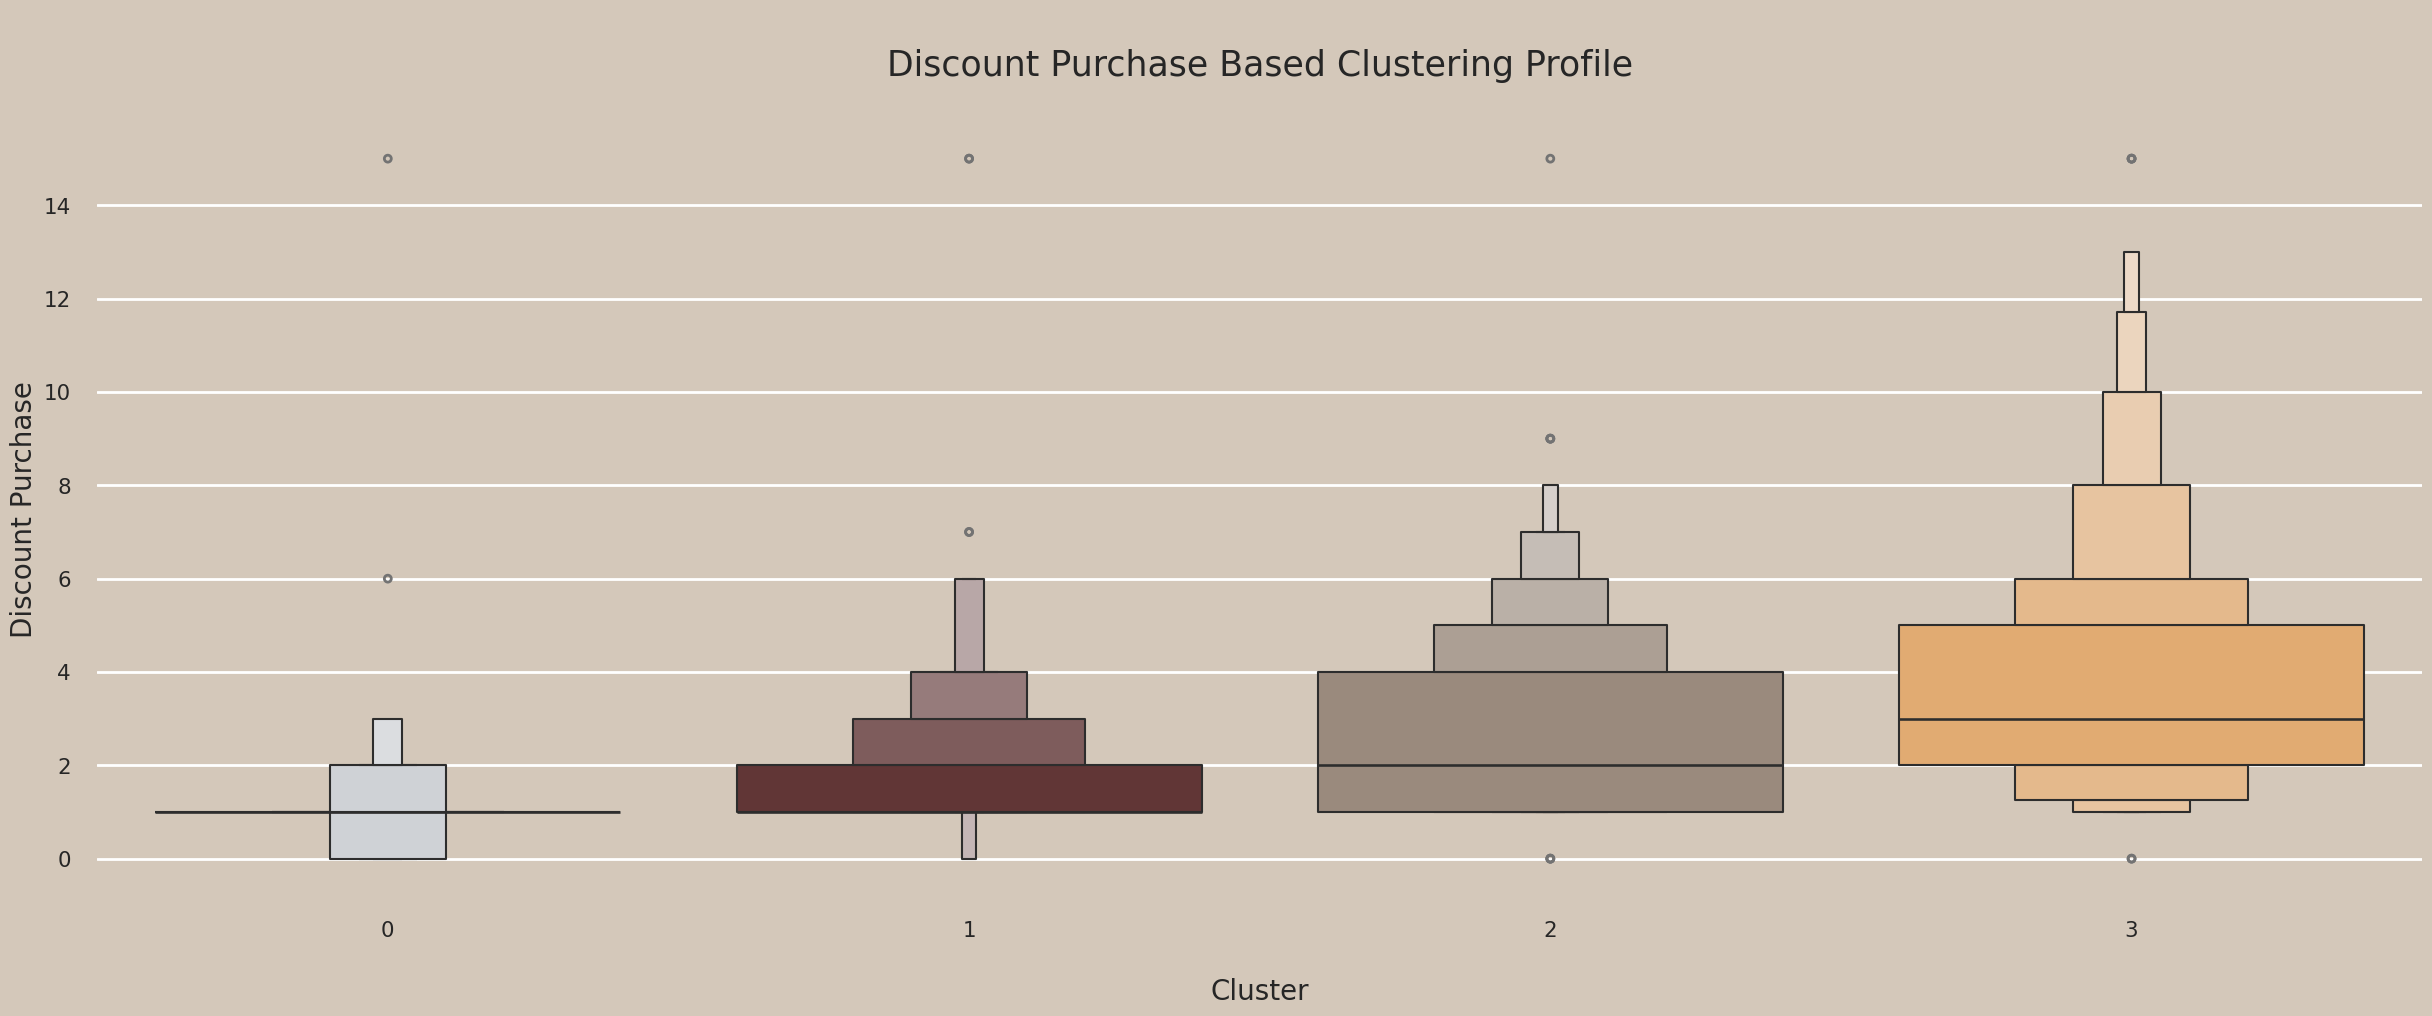

In [ ]:
display(Markdown("###Let's have a look on the characteristics of the clusters on the basis of discount purchases :"))

_, axes = plt.subplots(figsize=(30,10))
sns.boxenplot(x=data["Clusters"], y=data["Discount Purchases"], palette=["#B9C0C9","#682F2F", "#9F8A78","#F3AB60"])

axes.set_title("\nDiscount Purchase Based Clustering Profile\n",fontsize=25)
axes.set_ylabel("Discount Purchase",fontsize=20)
axes.set_xlabel("\nCluster",fontsize=20)

sns.despine(left=True, bottom=True)
plt.show()

**Insights from the Plot**

**Cluster Response Patterns:**

**Cluster 0:** Customers in this cluster accepted fewer promotions on average, with a large count in the zero-acceptance category, indicating a low interest in promotions.

**Cluster 1:** Has the highest count in zero-accepted promotions, suggesting that this cluster is the least responsive to promotions.

**Cluster 2 and 3:** Show varying levels of promotion acceptance, with higher numbers of customers accepting one or more promotions, indicating higher responsiveness to promotional offers.

**Promotion Acceptance Trends:**

There is a general decrease in the number of customers as the number of accepted promotions increases, with most customers clustered around zero or one accepted promotion.

In [ ]:
def cluster(feature):

    _, axes = plt.subplots(figsize=(20,8))
    sns.kdeplot(x=data[feature], y=data["Spent"], hue =data["Clusters"], kind="kde",height=10, palette=["#B9C0C9","#682F2F", "#9F8A78","#F3AB60"])
    axes.set_title(f"\nClustering Profile On {feature}\n",fontsize=25)
    axes.set_ylabel("Spending",fontsize=20)
    axes.set_xlabel(f"\n{feature}",fontsize=20)

    sns.despine(left=True, bottom=True)
    plt.show()

###Characteristics of clusters based on spending and having childern :

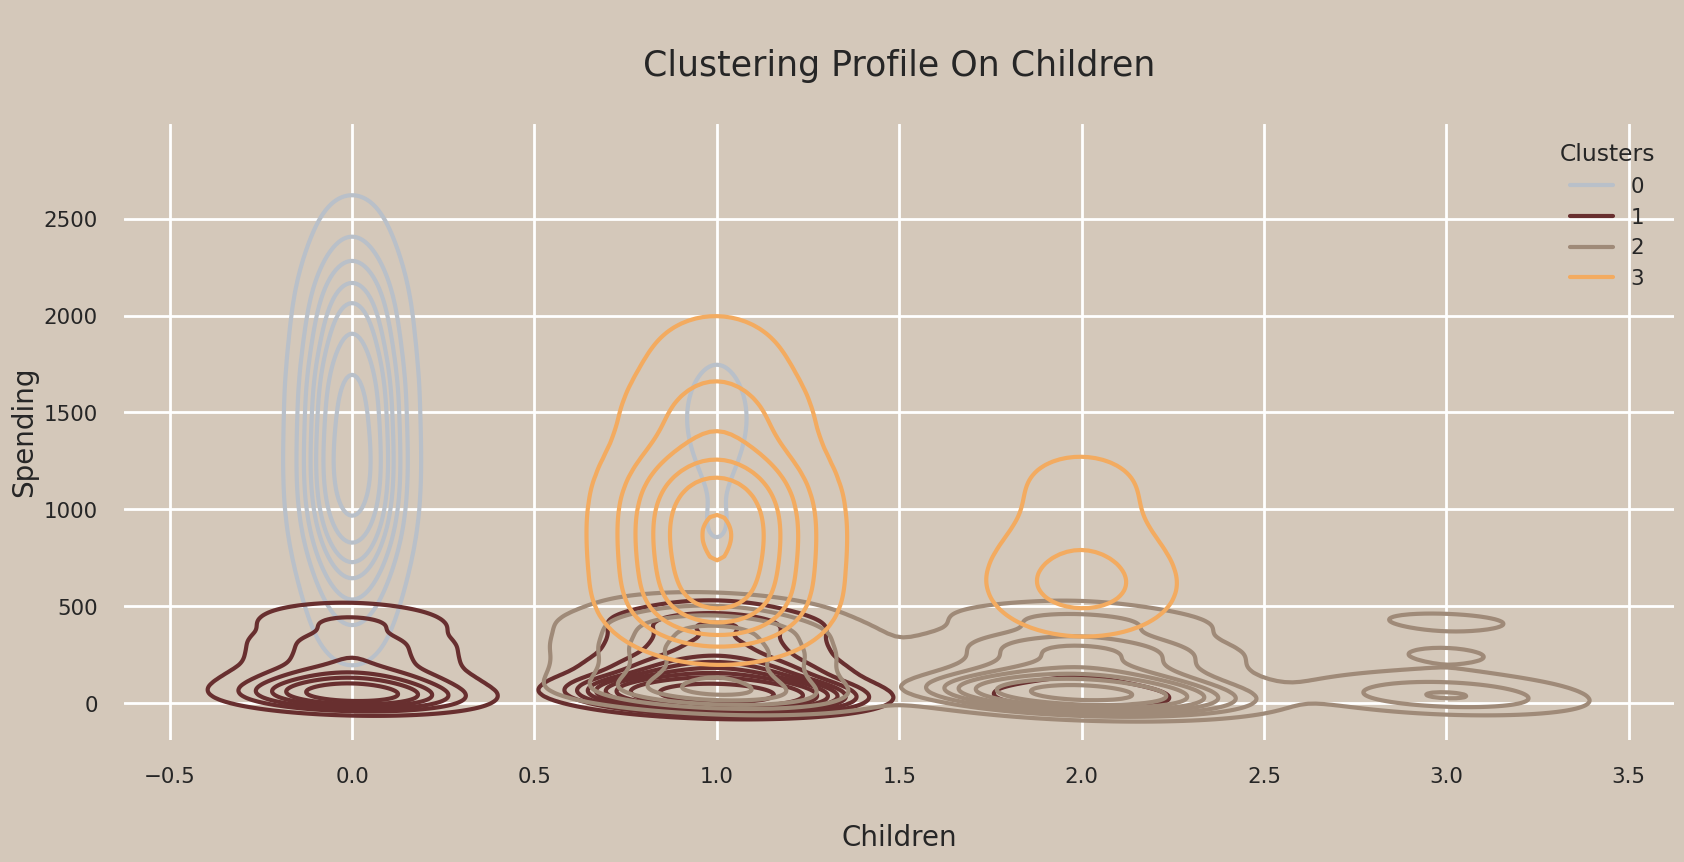

In [ ]:
display(Markdown("###Characteristics of clusters based on spending and having childern :"))
cluster("Children")

**Insights from the Plot**

**Cluster 0:** Has a high density of data points concentrated around low values for children and moderate spending.

**Cluster 1:** Shows a dense concentration at lower child counts and spending levels, indicating this group generally has fewer children and moderate to low spending.

**Cluster 2:** Exhibits a more spread-out distribution with a concentration on one child and moderate spending levels.

**Cluster 3:** Demonstrates a wider range in spending, with a peak density at one child, and generally higher spending than the other clusters.

This type of visualization helps identify which clusters spend more or less based on the number of children, useful for targeting customer segments with specific family-related spending behaviors.

###Characteristics of clusters based on spending and age :

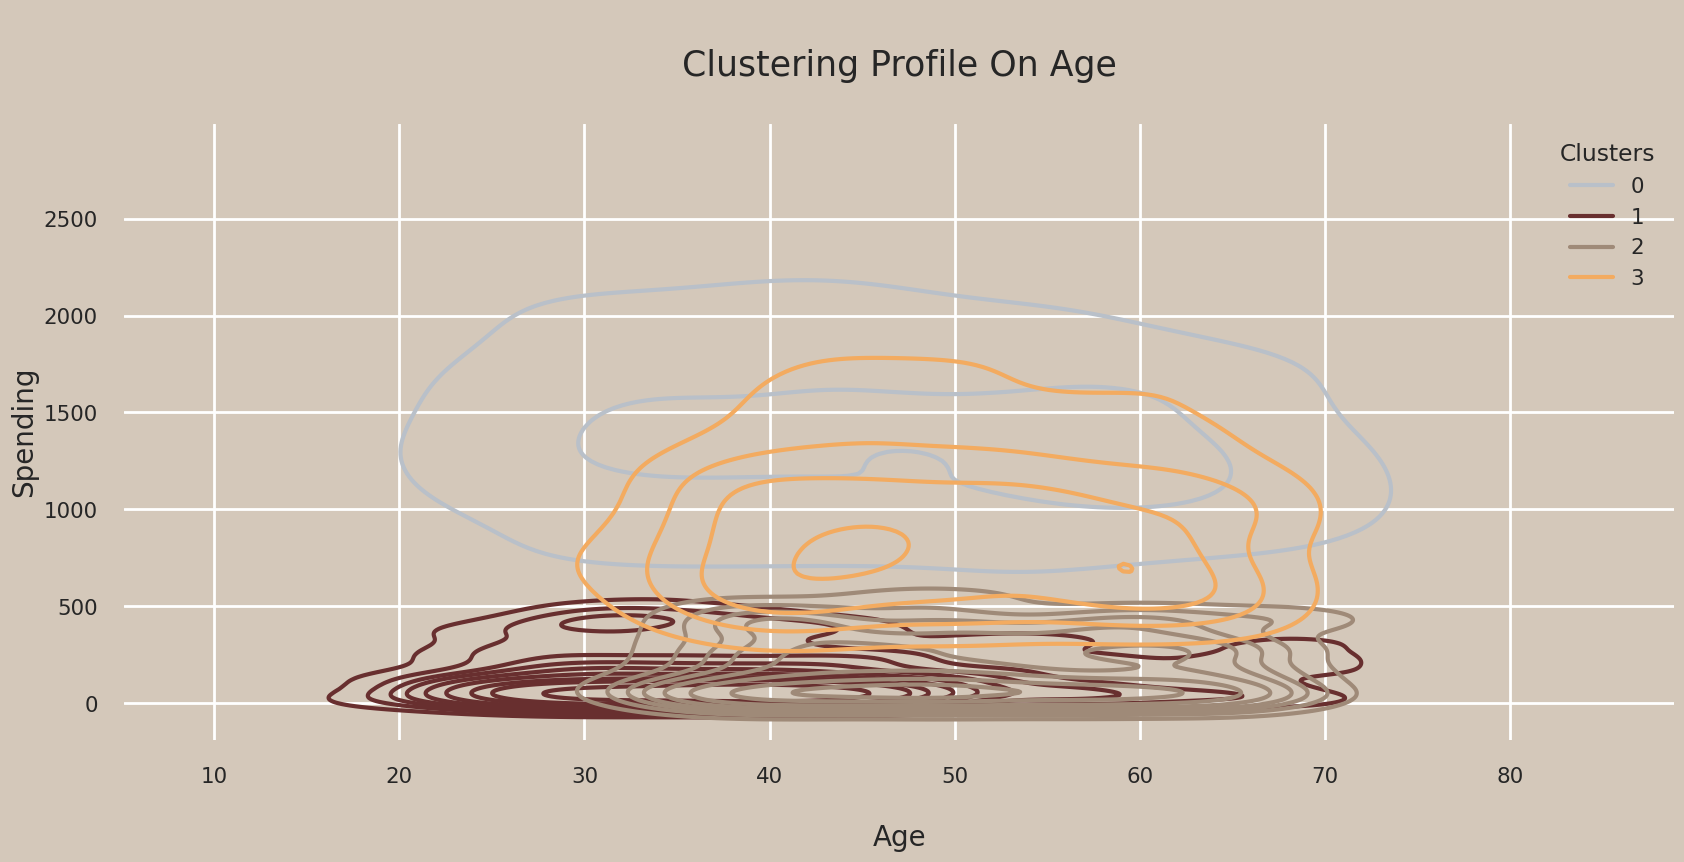

In [ ]:
display(Markdown("###Characteristics of clusters based on spending and age :"))
cluster("Age")

###Characteristics of clusters based on spending and education level :

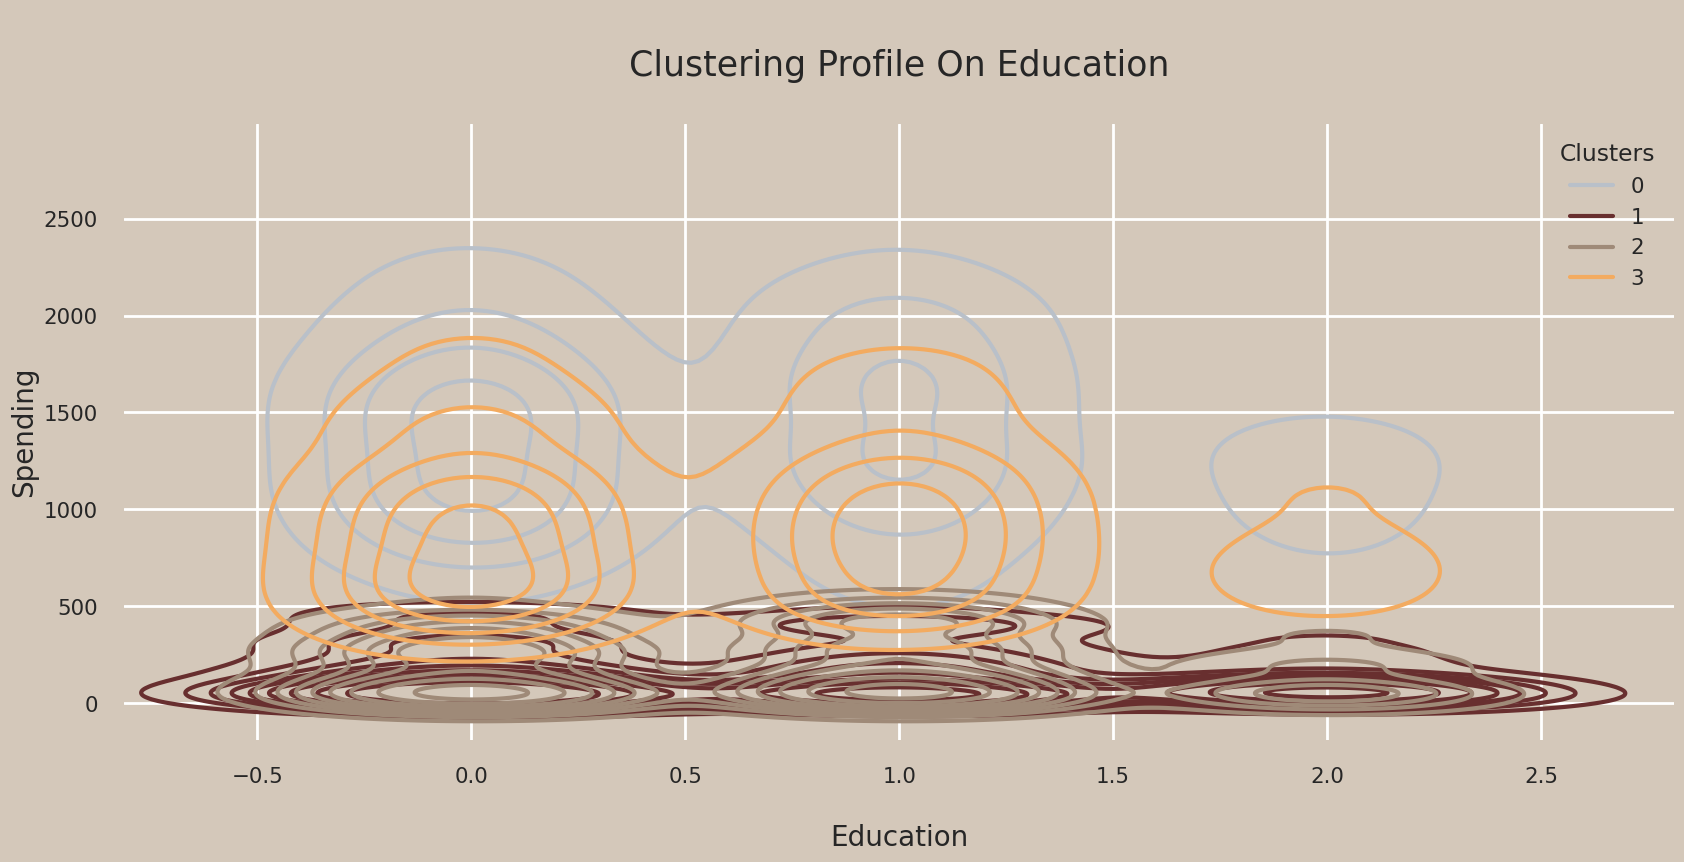

In [ ]:
display(Markdown("###Characteristics of clusters based on spending and education level :"))
cluster("Education")


###Characteristics of clusters based on spending and marital status :

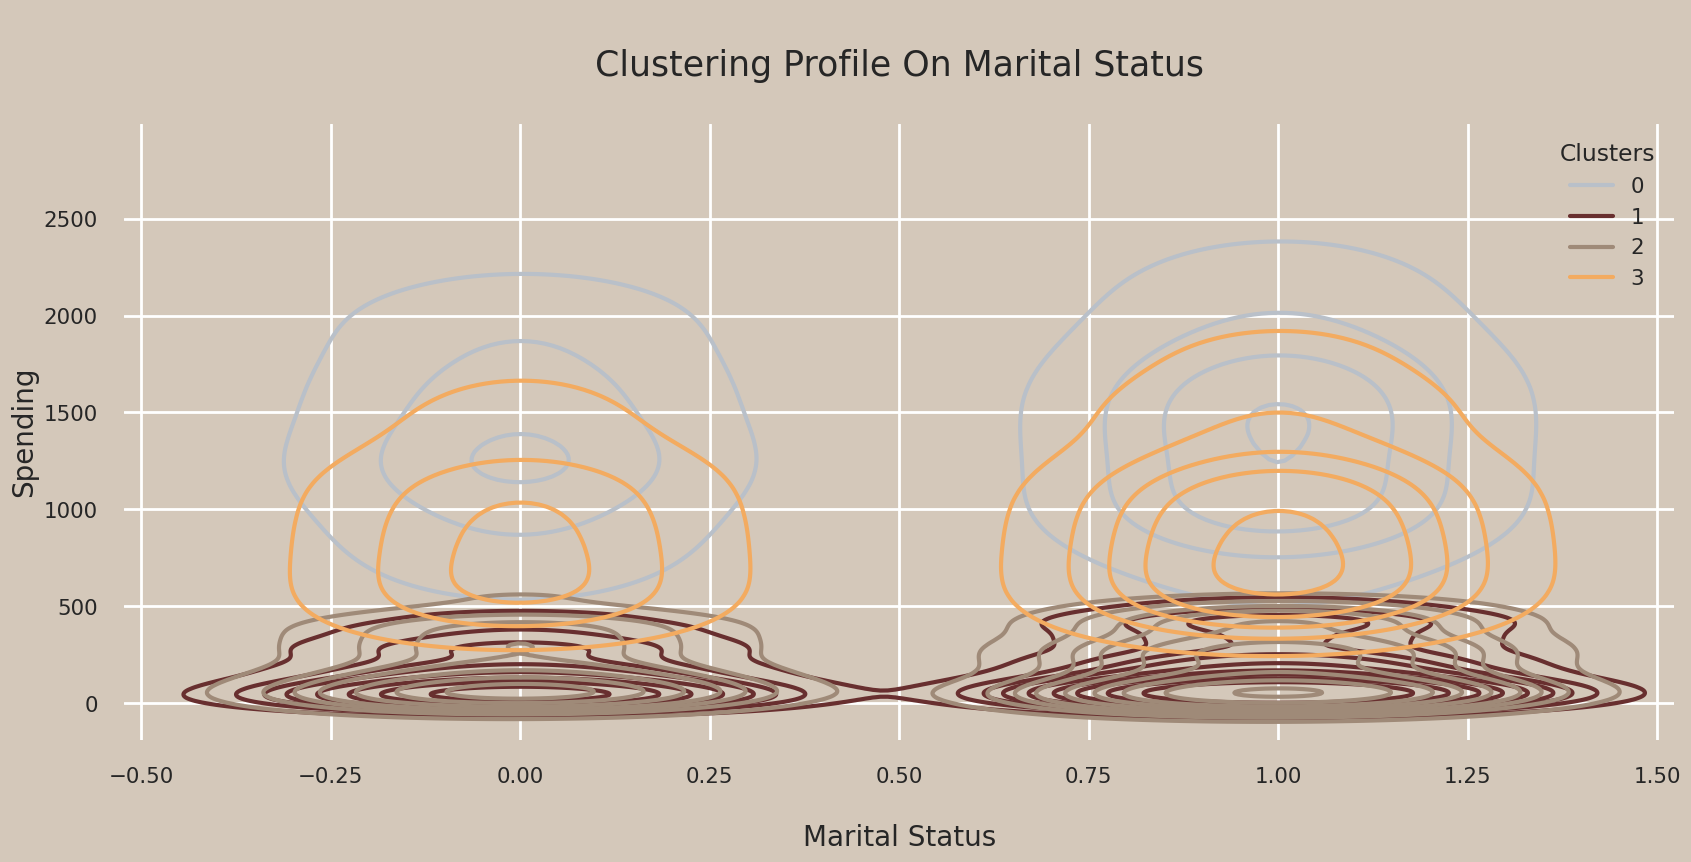

In [ ]:
display(Markdown("###Characteristics of clusters based on spending and marital status :"))
cluster("Marital Status")


###Characteristics of clusters based on spending and parental status :

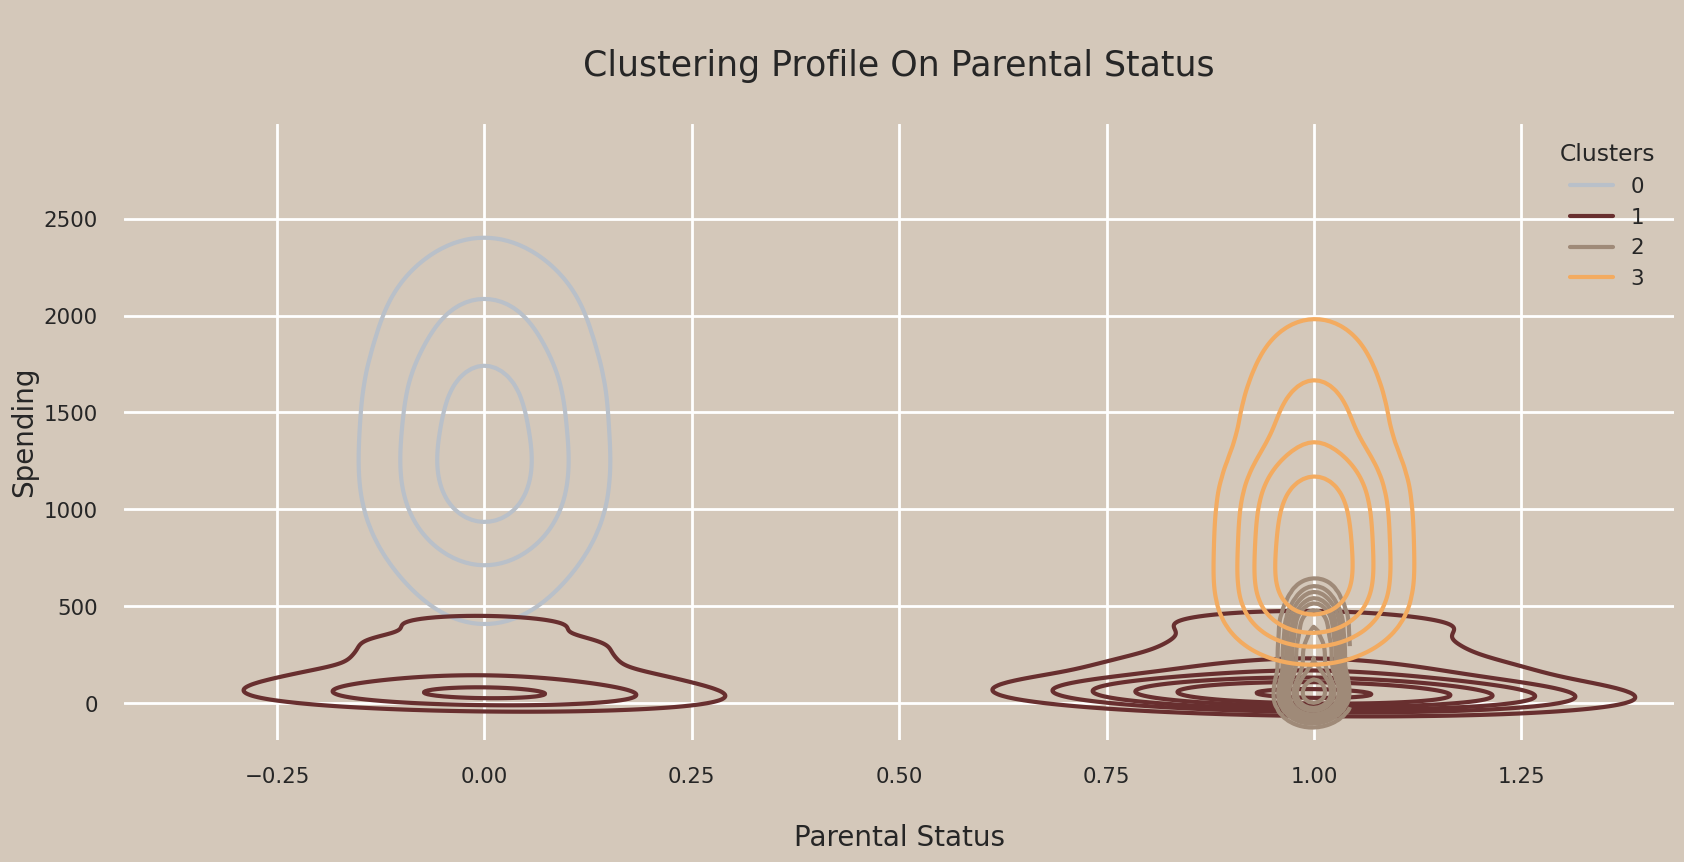

In [ ]:
display(Markdown("###Characteristics of clusters based on spending and parental status :"))
cluster("Parental Status")


###Characteristics of clusters based on spending and customer loyalty :

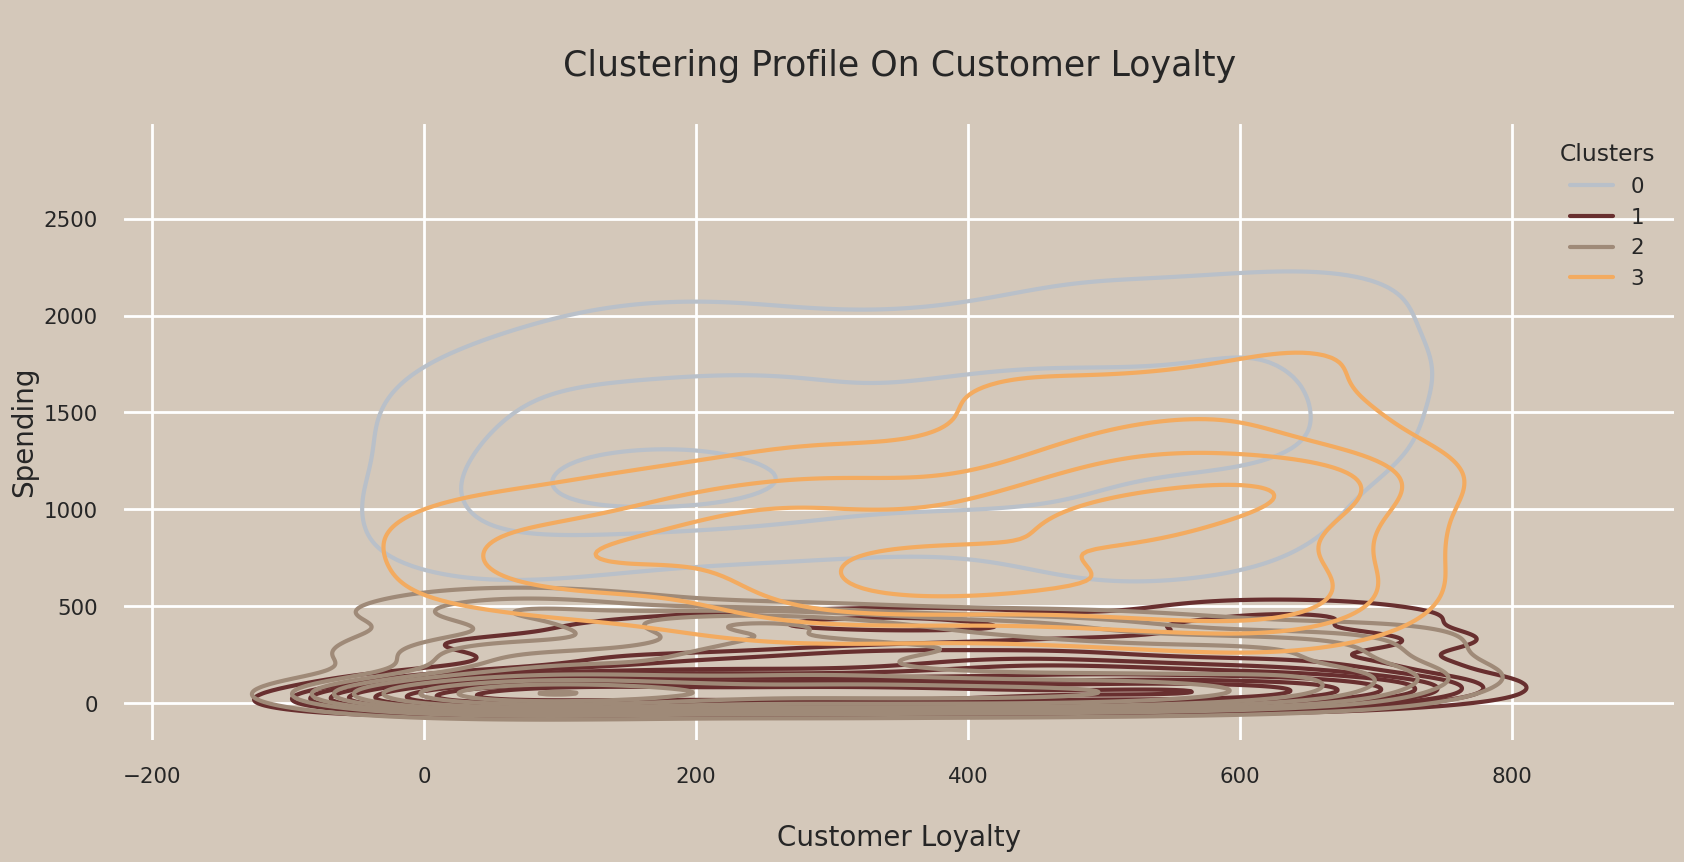

In [ ]:
display(Markdown("###Characteristics of clusters based on spending and customer loyalty :"))
cluster("Customer Loyalty")

**Summary of Cluster Comparisons**

**Cluster 0:** Moderate, balanced spenders, likely young professionals or singles, with moderate loyalty and sensitivity to value-based offers.

**Cluster 1:** Young, budget-conscious individuals, very sensitive to discounts and promotions, showing low spending and lower loyalty.

**Cluster 2:** Middle-aged, diverse backgrounds, moderate spenders with balanced views on discounts. They reflect an adaptable, middle-income group.

**Cluster 3:** Higher-income, older, educated, family-oriented with high spending and loyalty, less responsive to discounts, preferring premium products and services.

Each cluster’s unique traits can help in tailoring targeted marketing strategies. For example, Cluster 1 could be approached with budget-friendly options, while Cluster 3 would be more receptive to premium, loyalty-driven programs.

##Buliding a predictive model for ADs

---



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder


# Define the target variable (assume 'Response' is engagement)
data['Engagement'] = data['Response']

# Drop columns that may not be useful for the model
data = data.drop(['ID', 'Response', 'Dt_Customer'], axis=1)

# Handle categorical variables
categorical_features = ['Education', 'Marital_Status']
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns.difference(['Engagement'])

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Split data into features and target
X = data.drop('Engagement', axis=1)
y = data['Engagement']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the model pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train the model
pipeline.fit(X_train, y_train)

# Predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8705357142857143
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.97      0.93       577
           1       0.61      0.24      0.35        95

    accuracy                           0.87       672
   macro avg       0.75      0.61      0.64       672
weighted avg       0.85      0.87      0.85       672

